In [70]:
import pandas as pd
from matplotlib import pyplot as plt

In [71]:
df = pd.read_csv('../../msd_full.csv')

In [72]:
df['duration'] = df['duration'] * 1000

In [73]:
df = df[df['year'] != 0]
df = df[df['popularity'] != 0]
df = df[df['tempo'] != 0]

### Tempo Classification

| Code     | Name    | Tempo |
| -------- | ------- | ----- |
| 1 | Grave | 20-39 BPM |
| 2 | Lento | 40-45 BPM |
| 3 | Largo | 46-50 BPM |
| 4 | Adagio | 51-65 BPM |
| 5 | Adagietto | 66-69 BPM |
| 6 | Andante | 70-77 BPM |
| 7 | Moderato | 78-97 BPM |
| 8 | Allegretto | 98-109 BPM |
| 9 | Allegro | 110-132 BPM |
| 10 | Vivace | 133-140 BPM |
| 11 | Presto | 141-177 BPM |
| 12 | Prestissimo | 178+ BPM |

In [74]:
def tempo_classify(tempo):
    if tempo <= 39:
        return 1
    elif tempo > 39 and tempo <= 45:
        return 2
    elif tempo > 45 and tempo <= 50:
        return 3
    elif tempo > 50 and tempo <= 65:
        return 4
    elif tempo > 65 and tempo <= 69:
        return 5
    elif tempo > 69 and tempo <= 77:
        return 6
    elif tempo > 77 and tempo <= 97:
        return 7
    elif tempo > 97 and tempo <= 109:
        return 8
    elif tempo > 109 and tempo <= 132:
        return 9
    elif tempo > 132 and tempo <= 140:
        return 10
    elif tempo > 140 and tempo <= 177:
        return 11
    elif tempo > 177:
        return 12
    else:
        return None

df['tempo'] = df['tempo'].apply(tempo_classify)

In [75]:
df['tempo'].unique()

array([ 7,  8, 12,  9, 11, 10,  4,  2,  6,  5,  3,  1])

In [76]:
conteo = df.groupby(['year', 'tempo']).size()

# with open('conteo.txt', 'w') as f:
#     for (year, tempo), count in conteo.items():
#         f.write(f"Year: {year}, Tempo: {tempo}, Count: {count}\n")

# print("Conteo guardado en 'conteo.txt'")

In [77]:
unique_years = sorted(df['year'].unique())

/var/folders/37/g9sqcyhs1vj596s6khbkj4hw0000gn/T/ipykernel_9993/2959432707.py:11: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure(figsize=(10, 6))


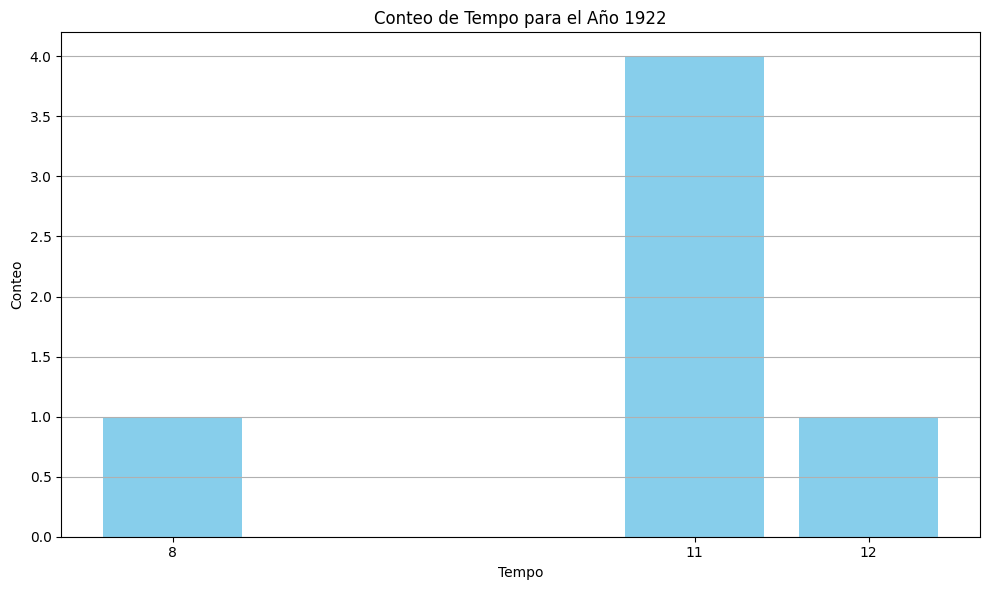

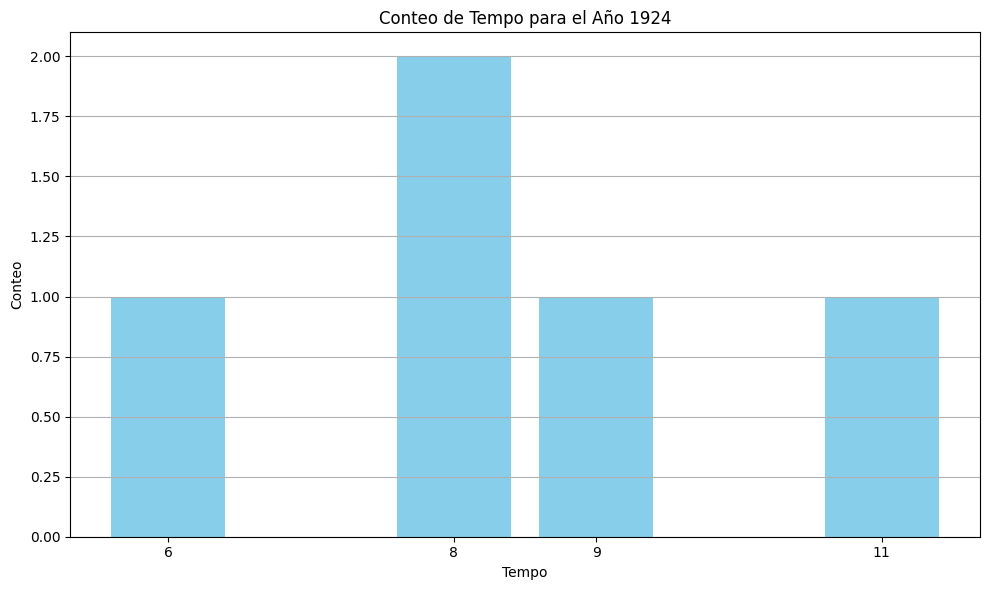

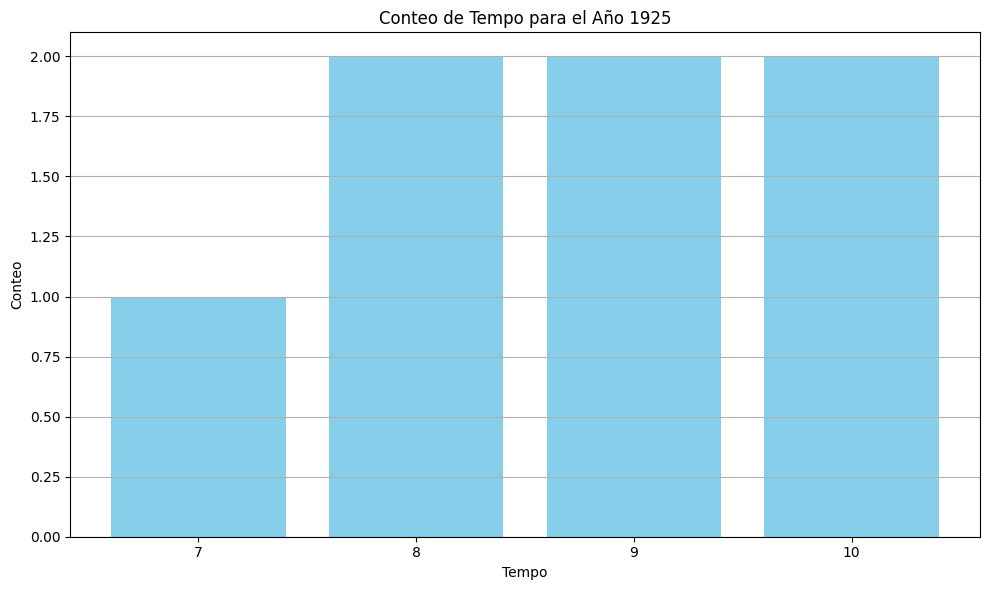

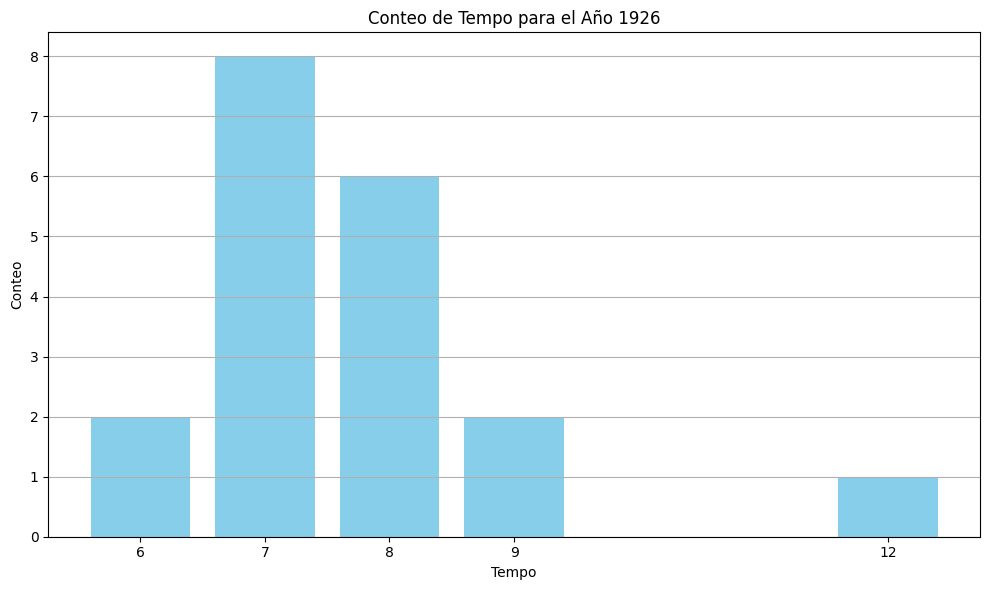

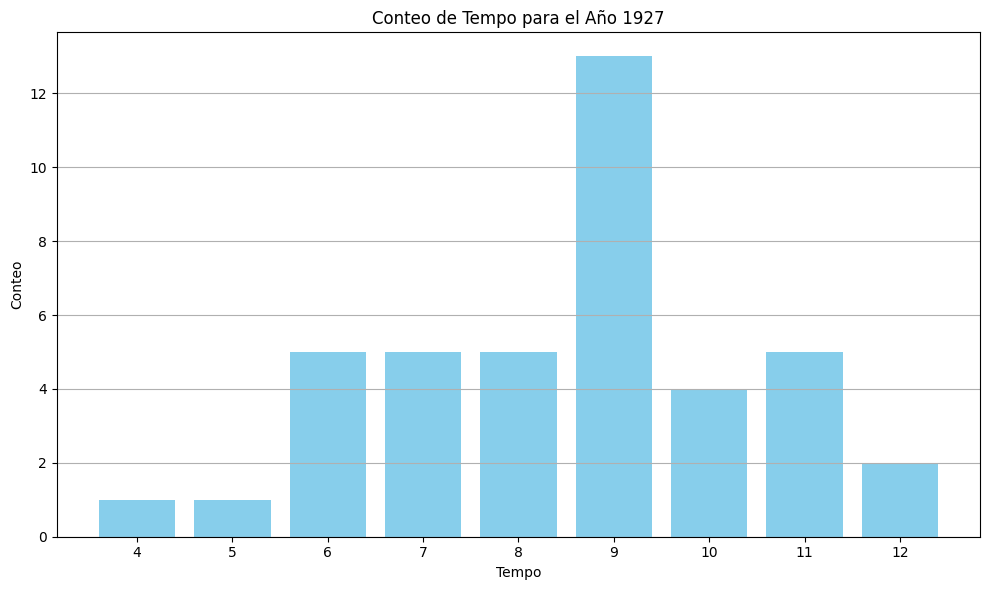

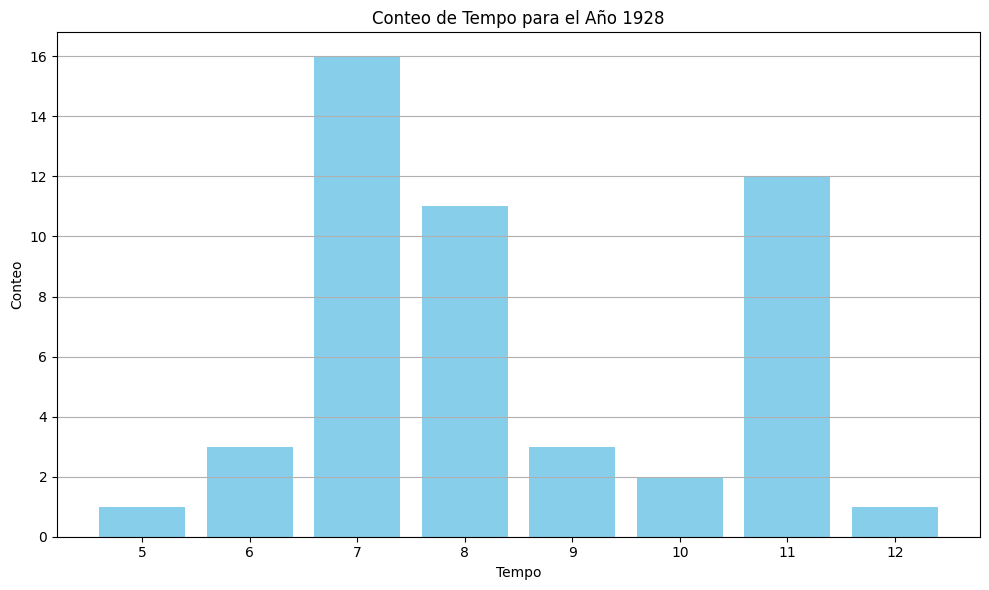

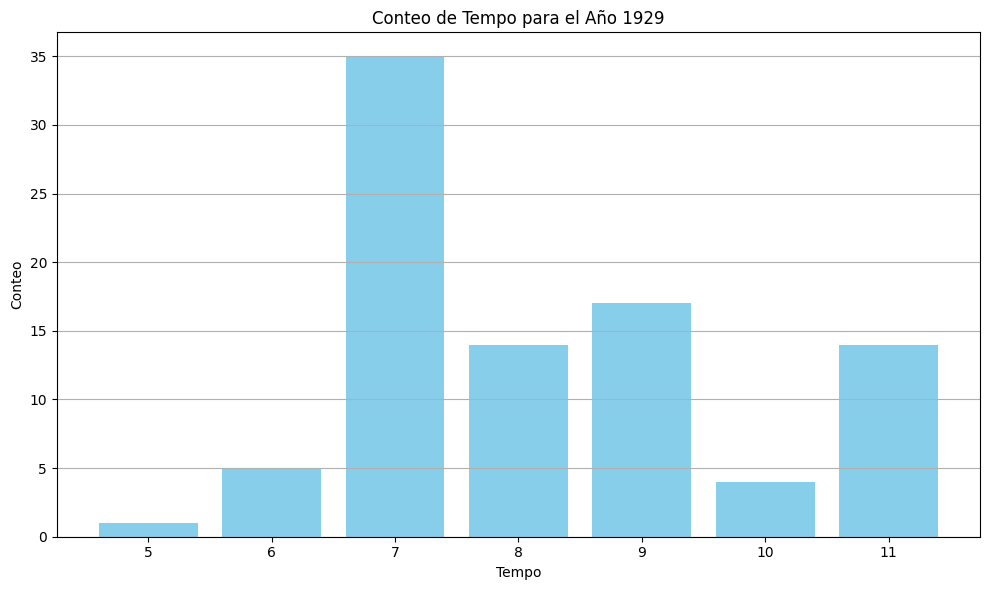

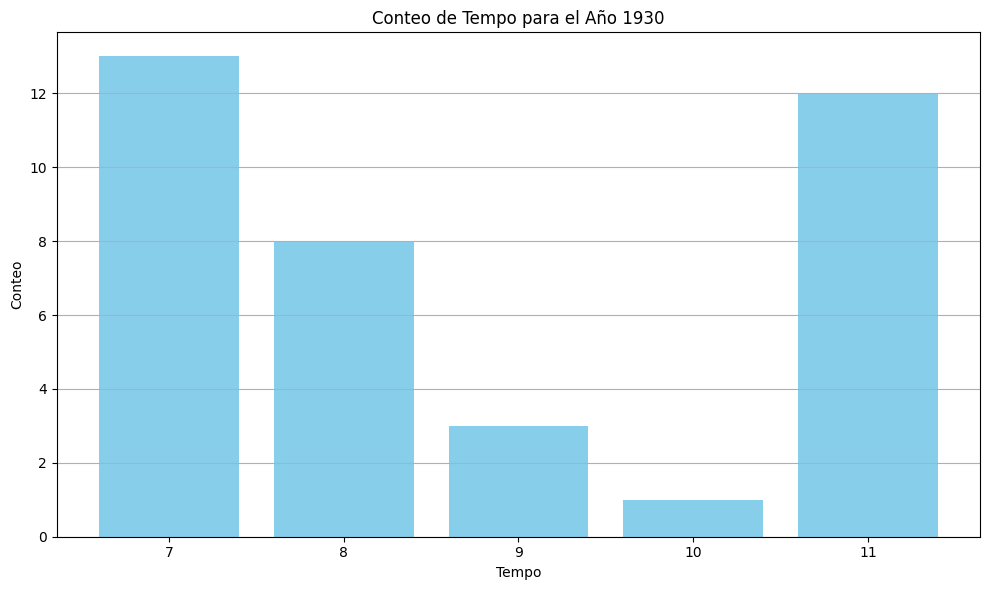

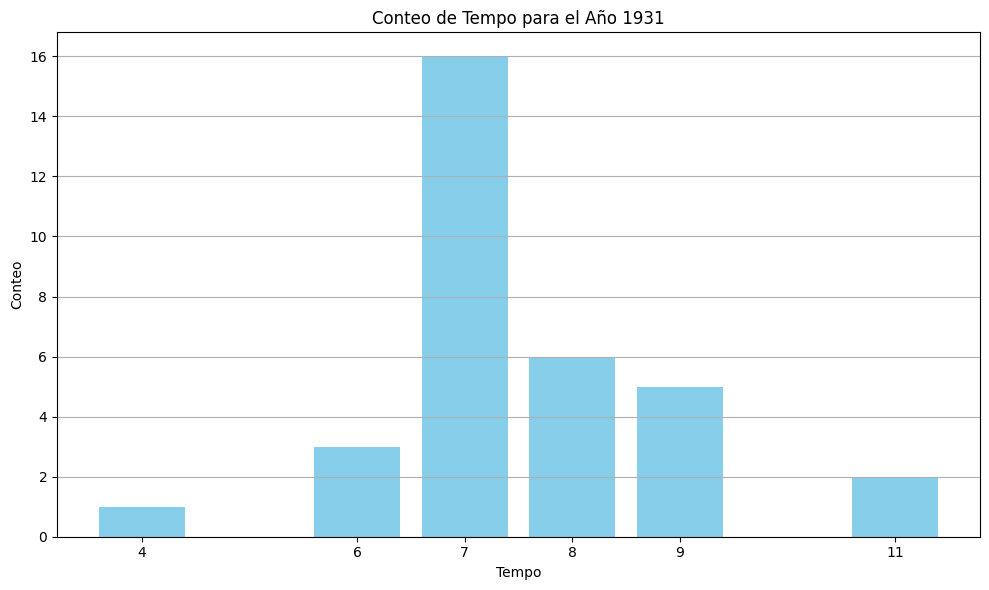

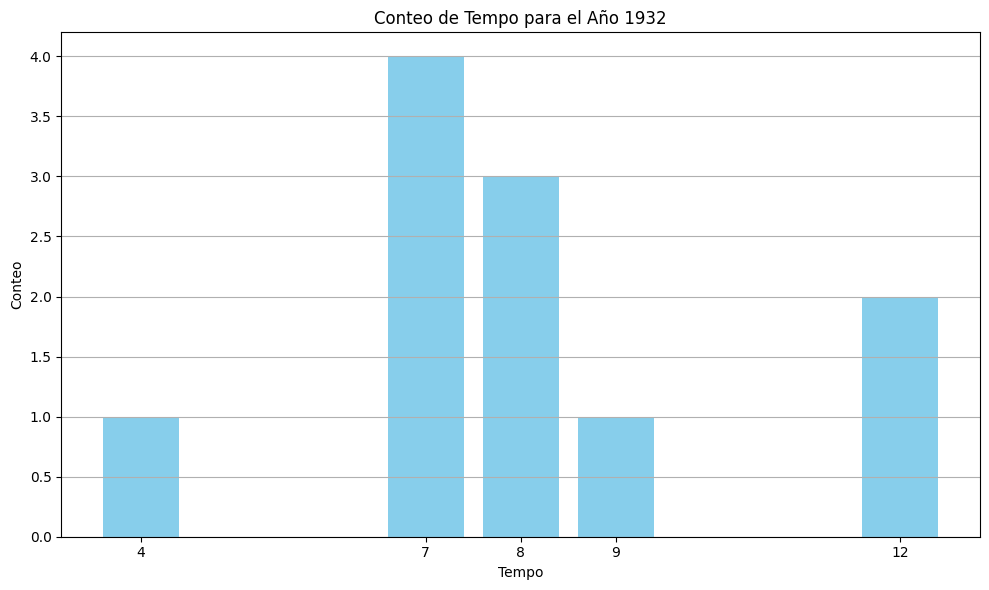

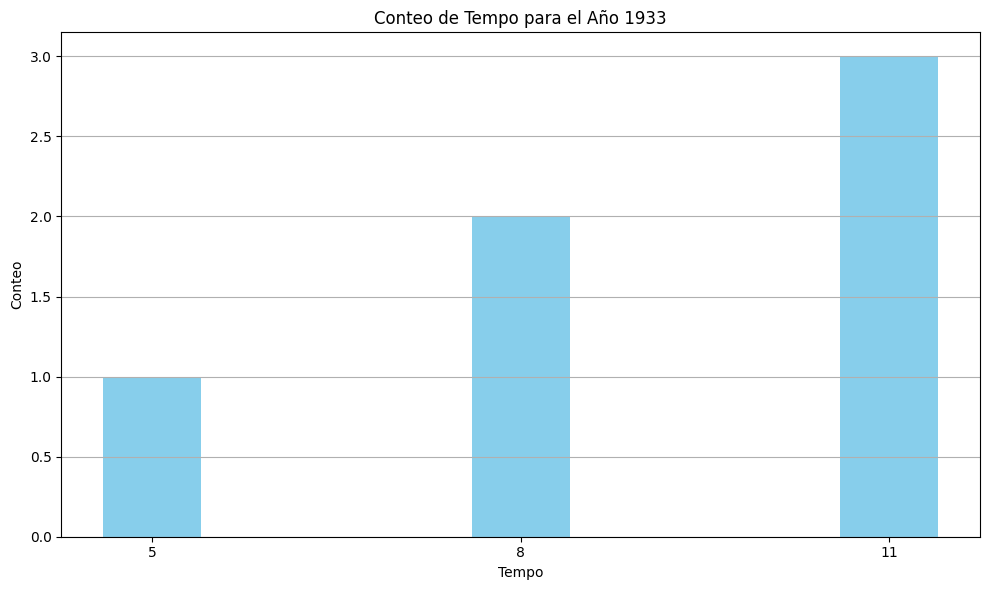

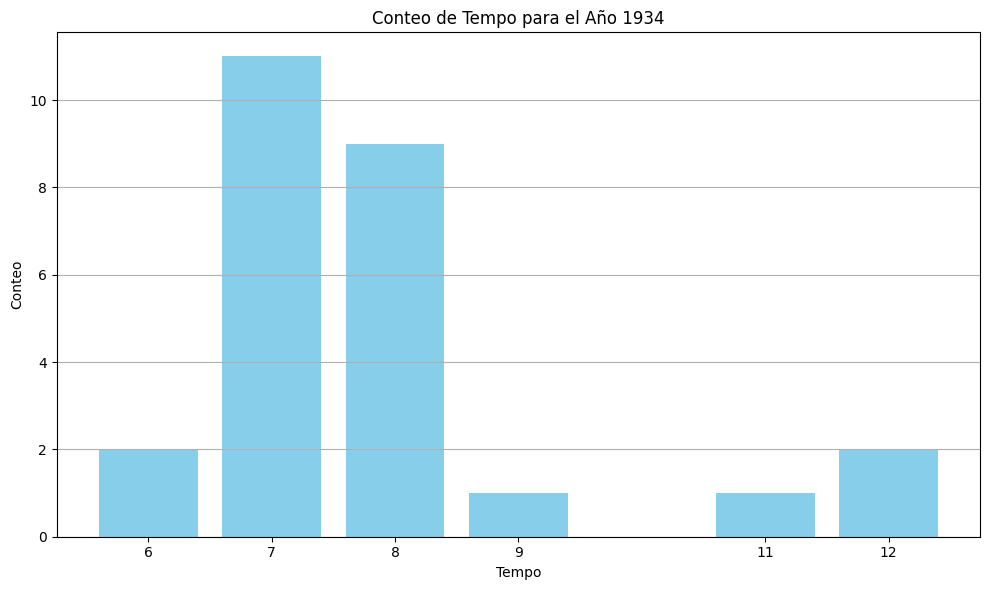

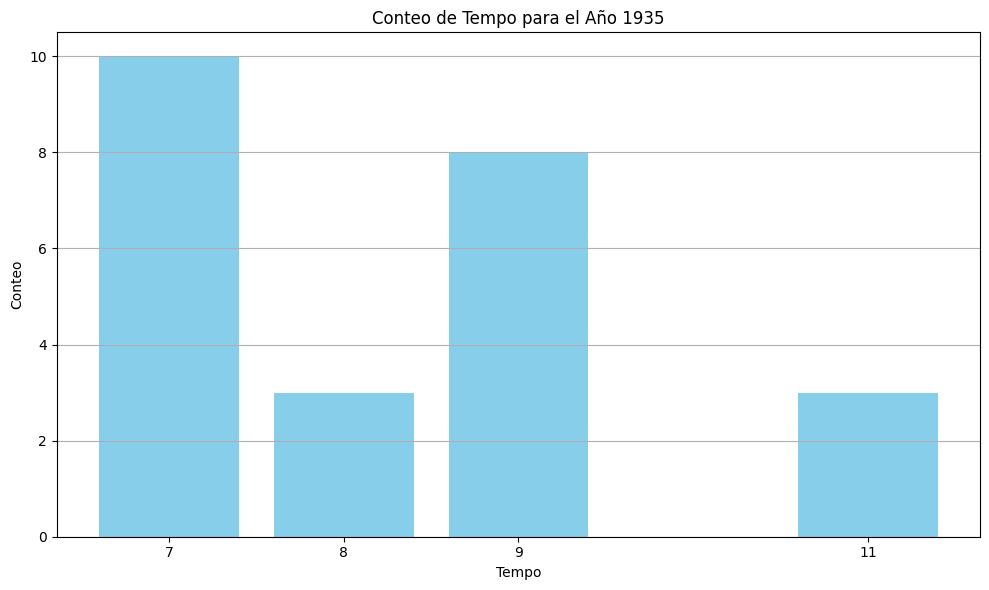

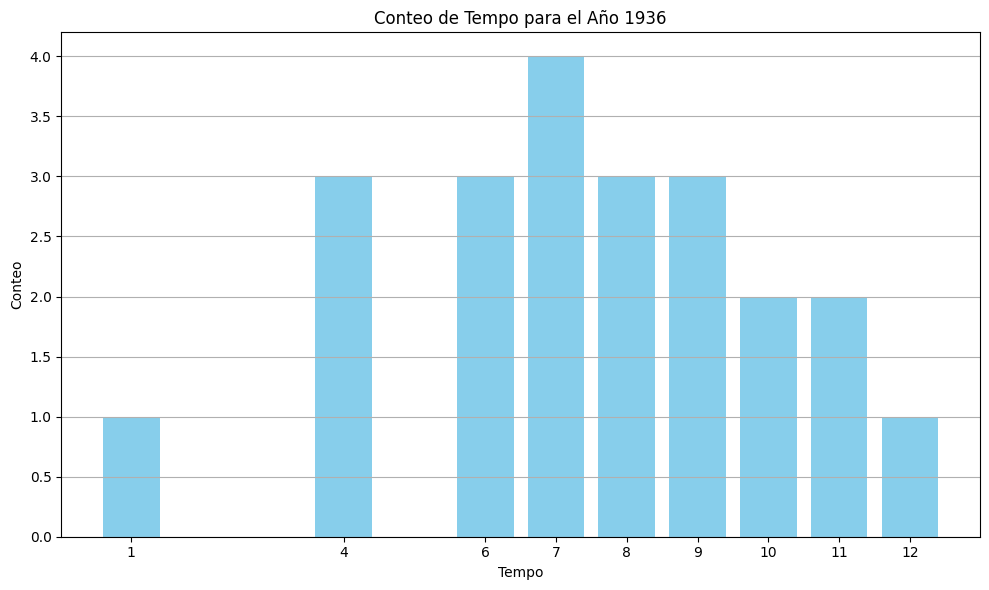

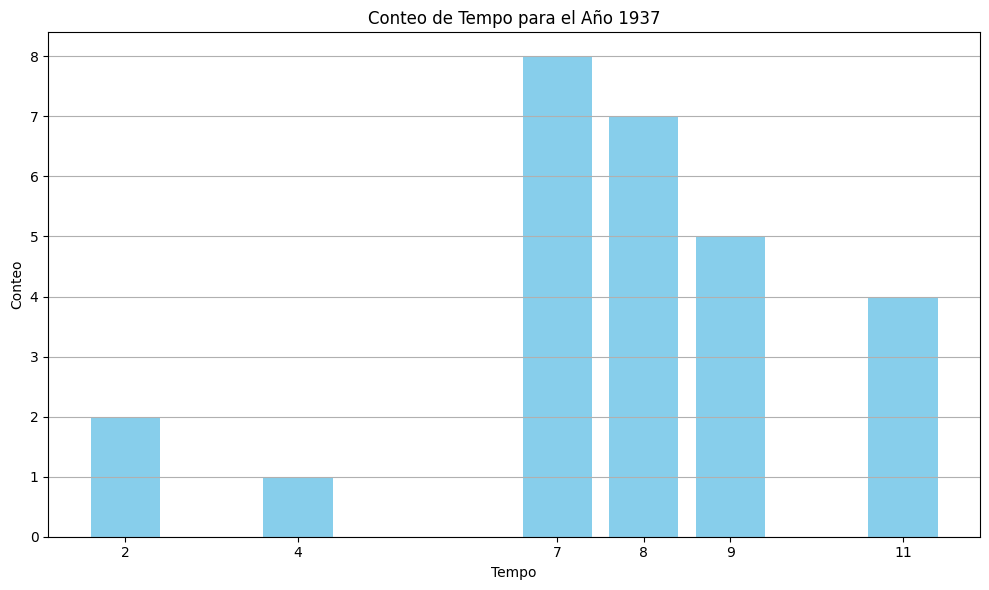

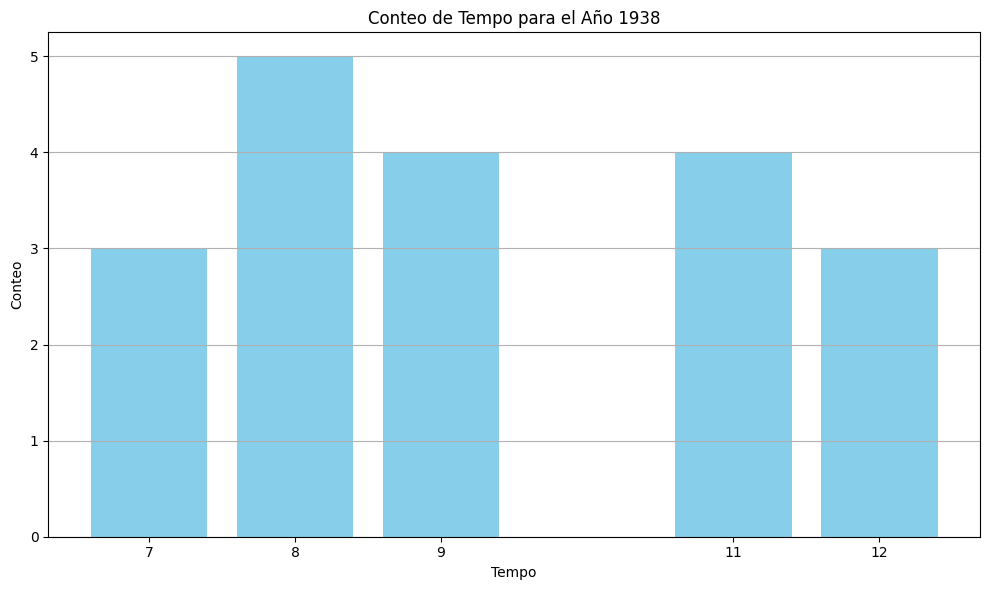

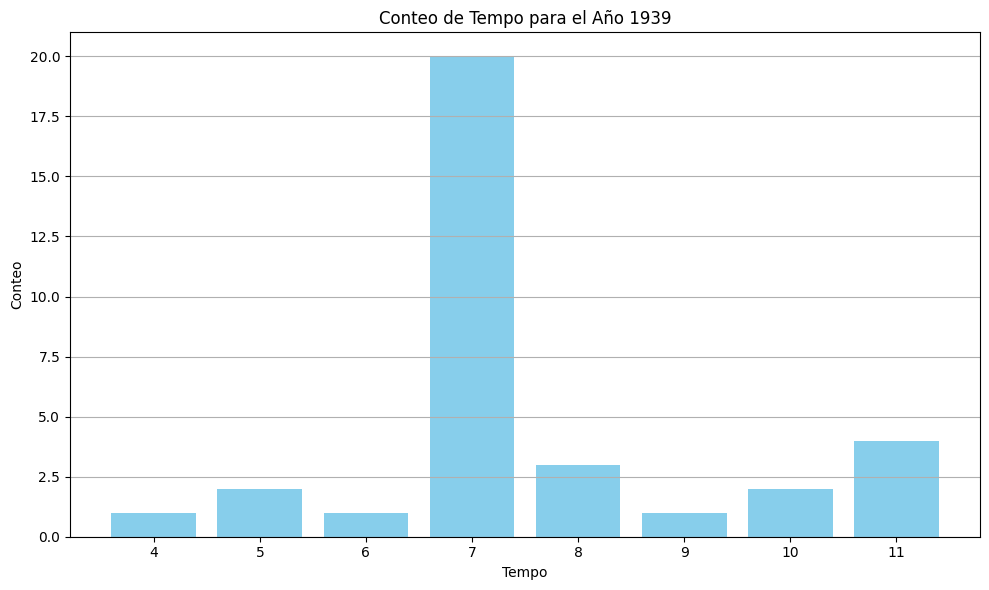

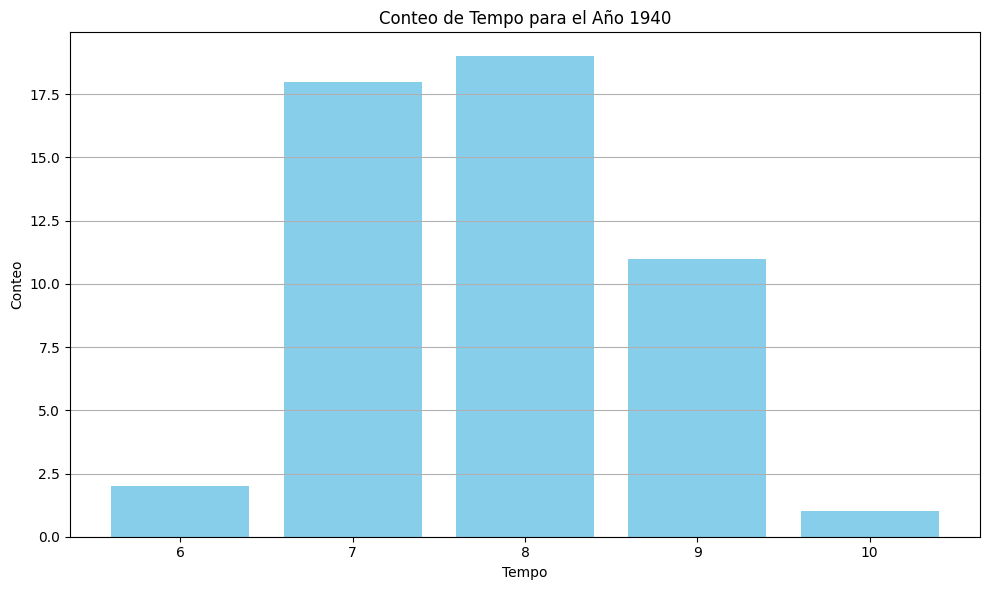

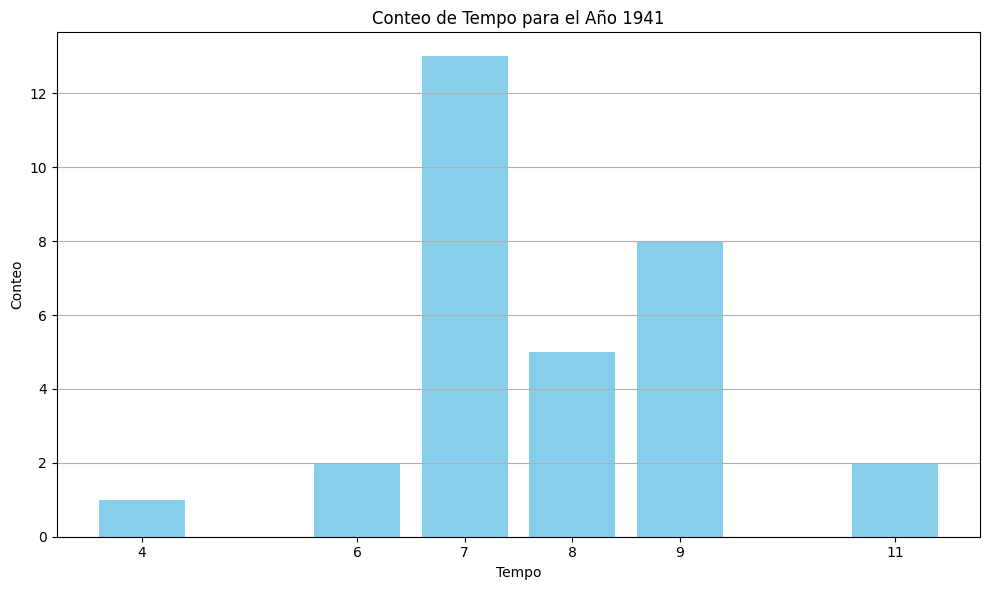

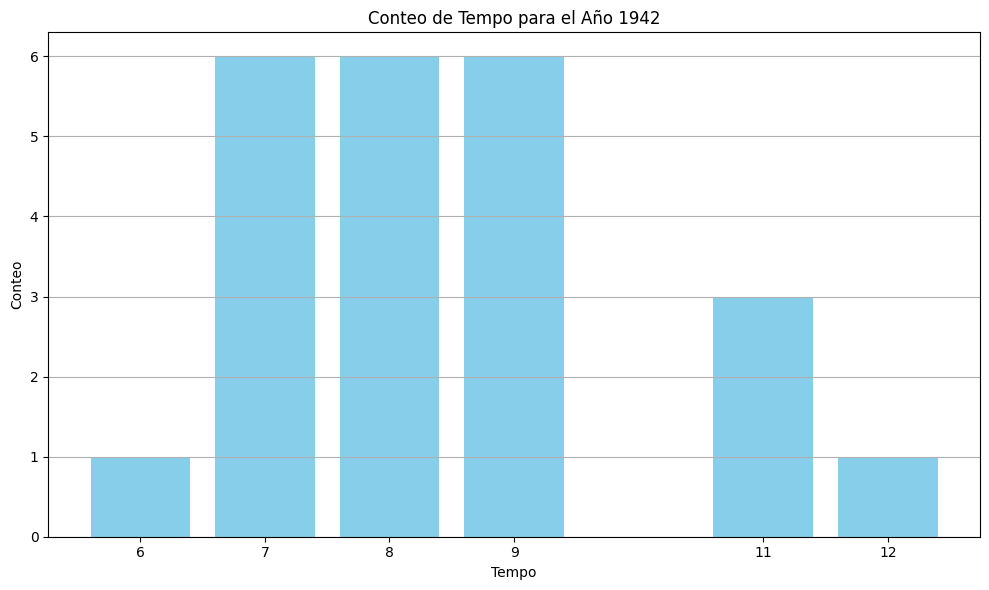

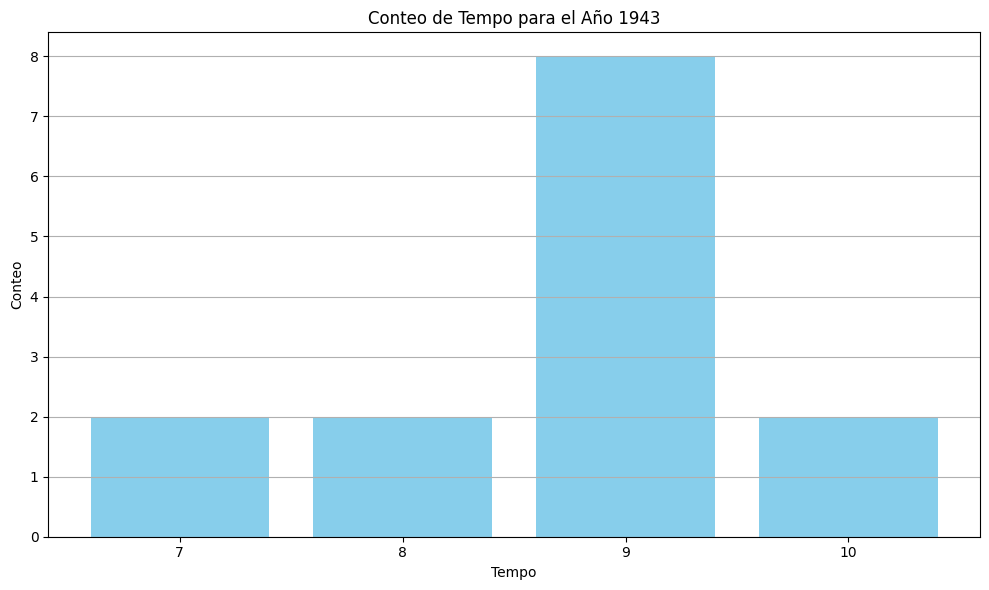

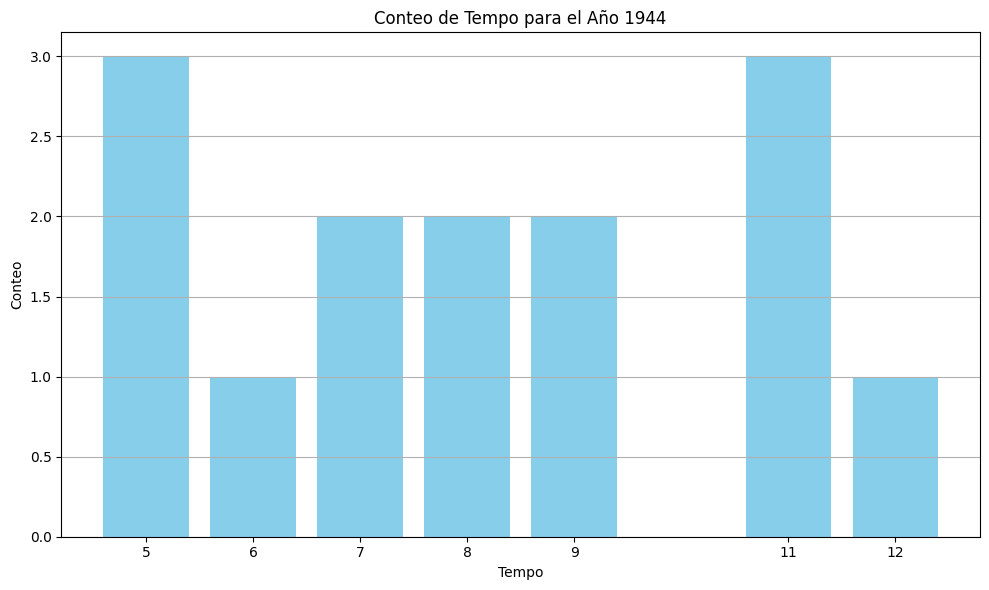

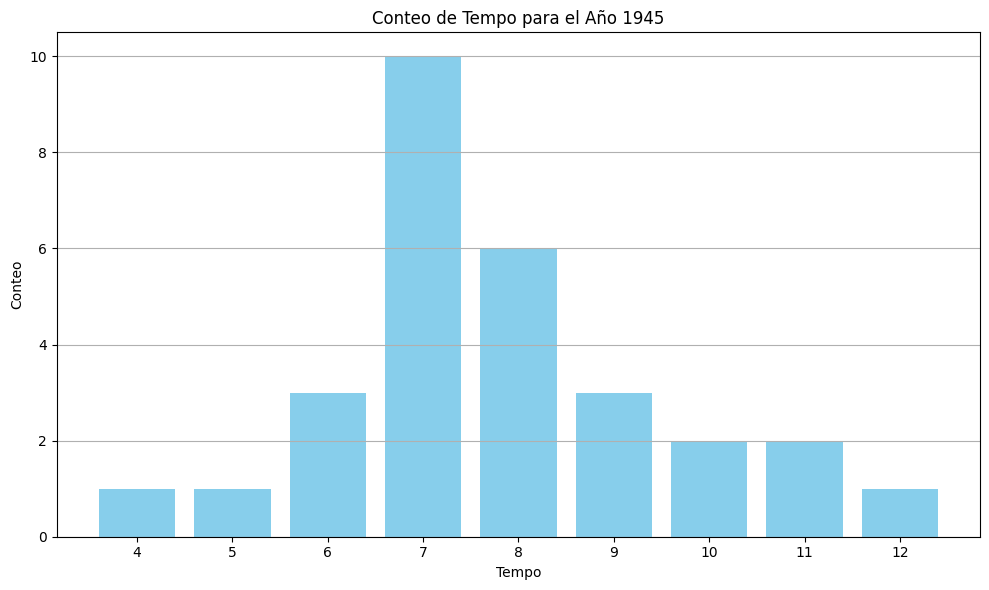

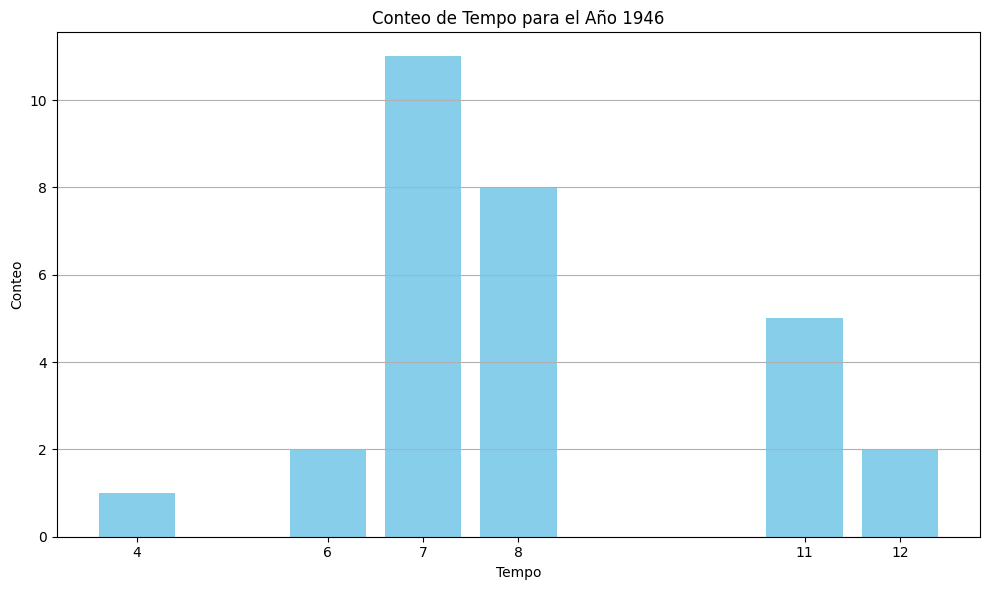

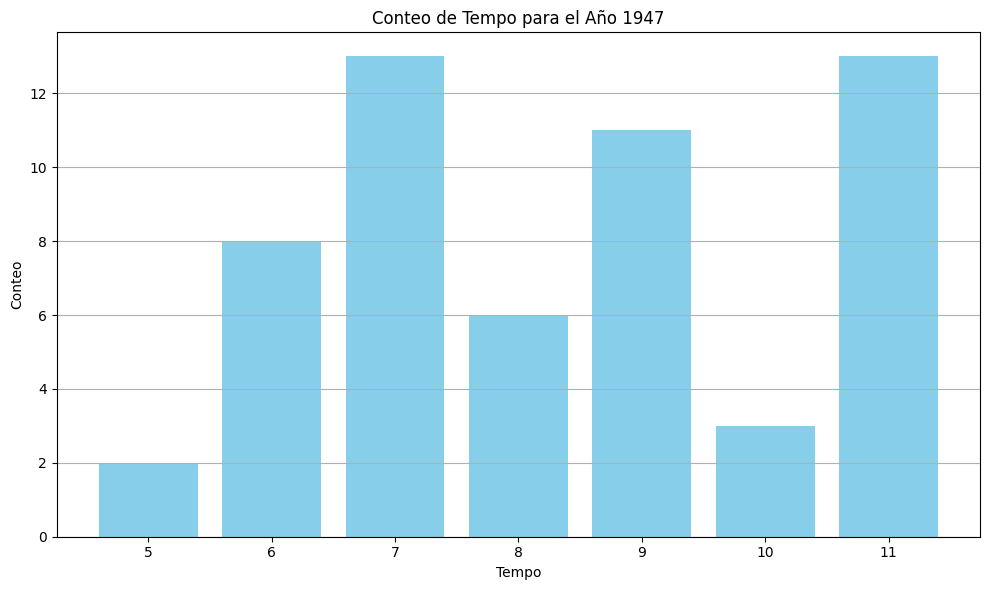

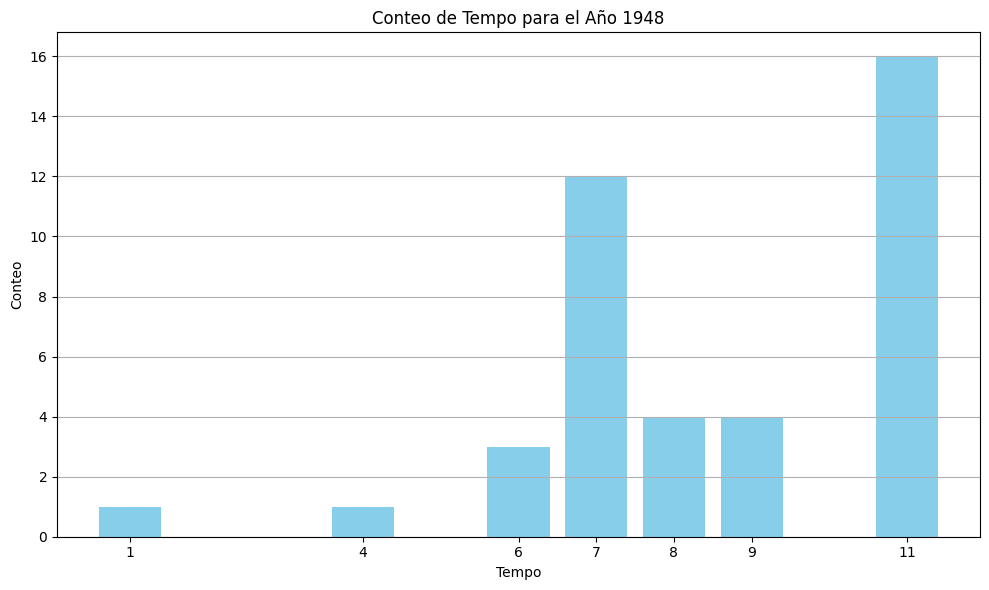

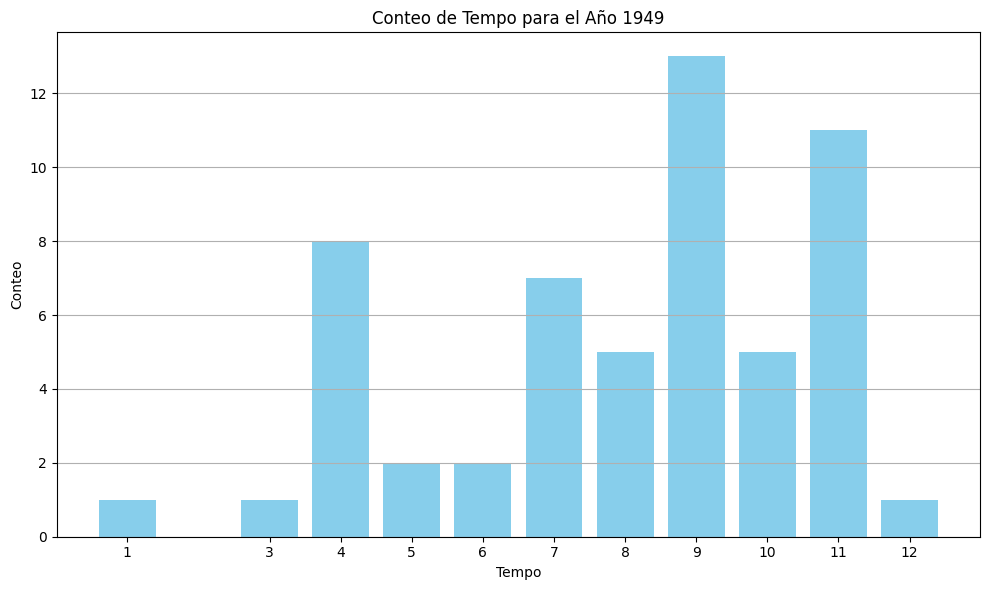

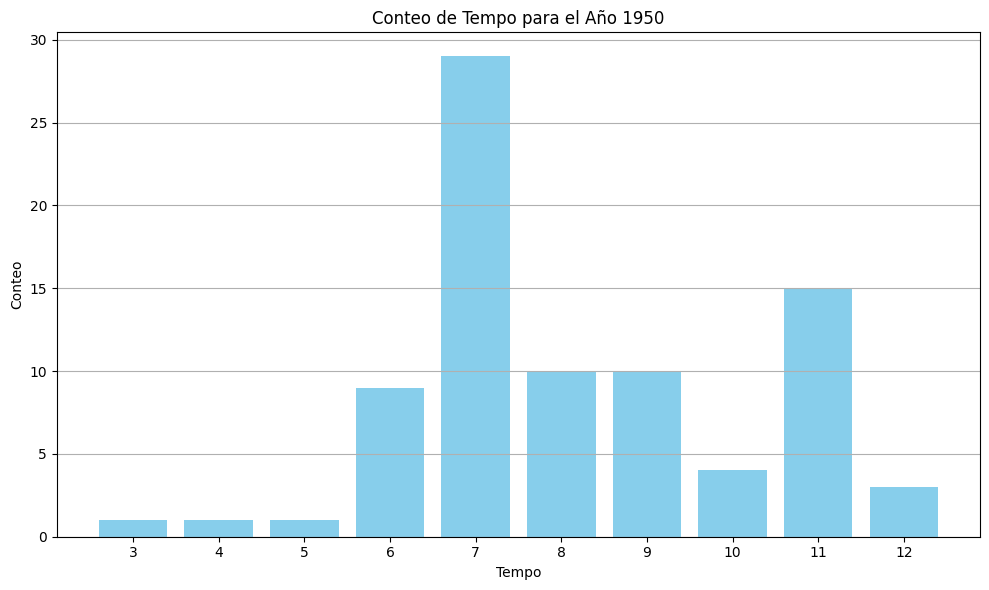

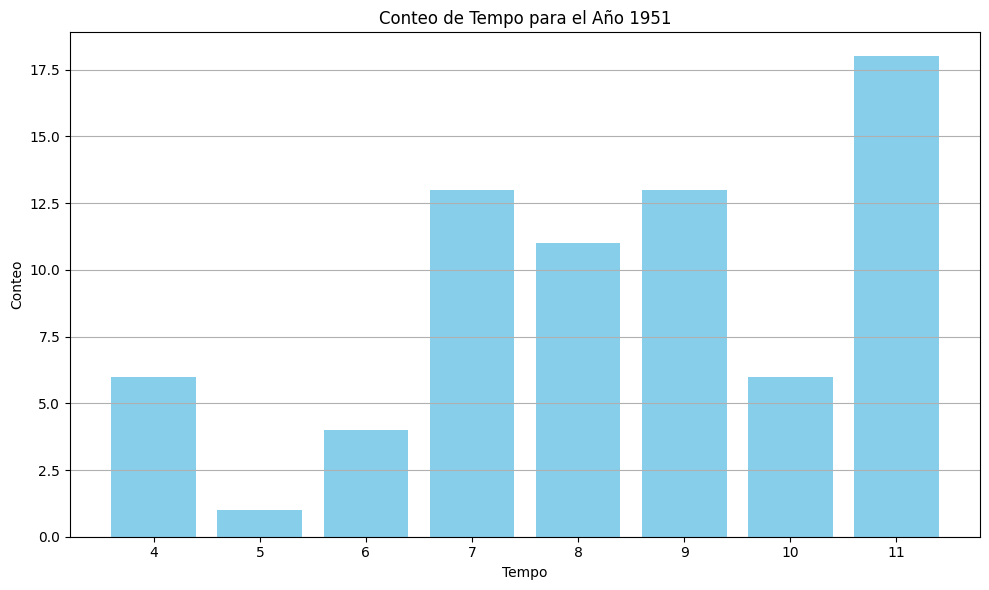

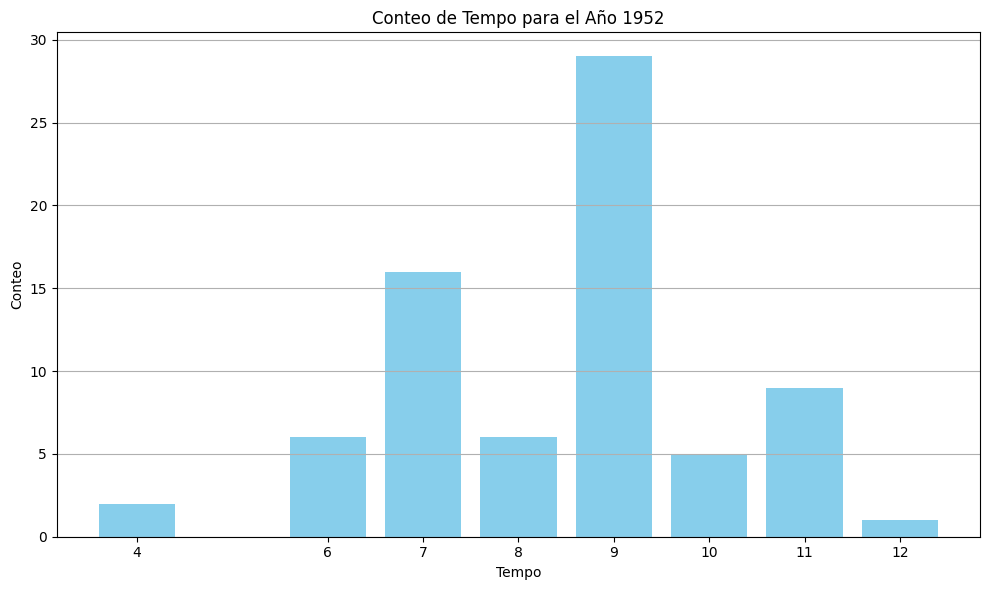

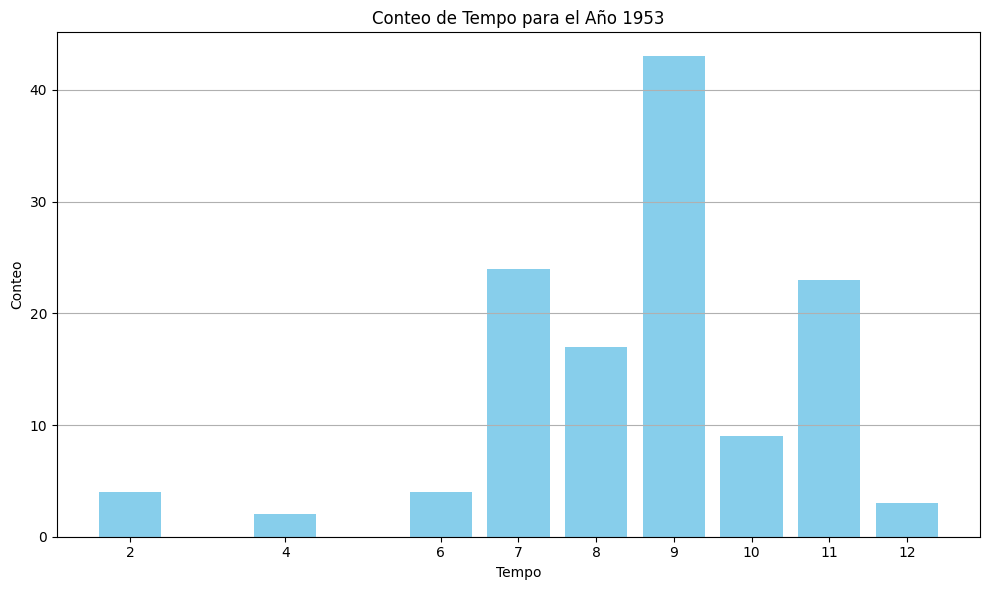

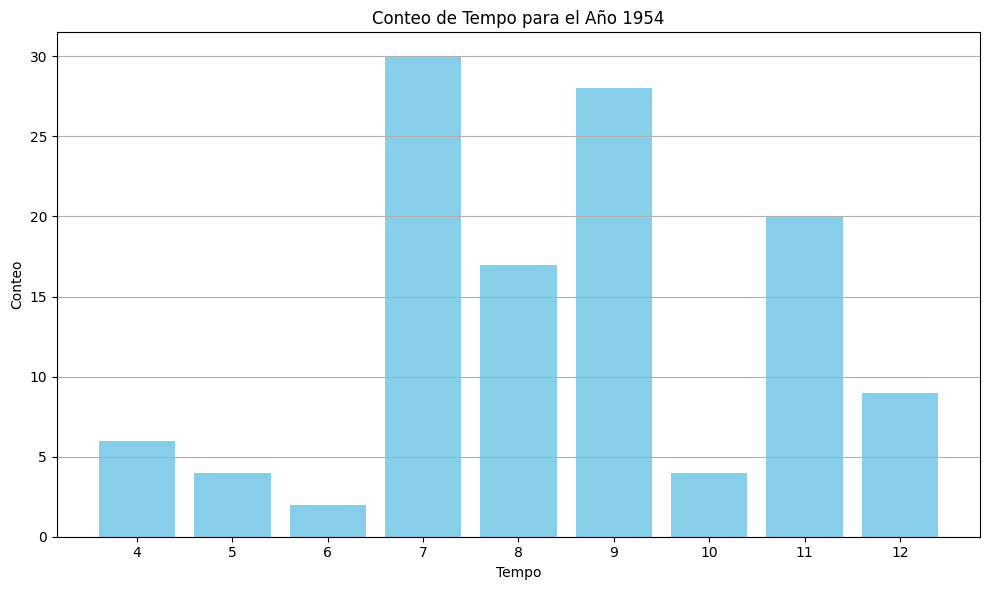

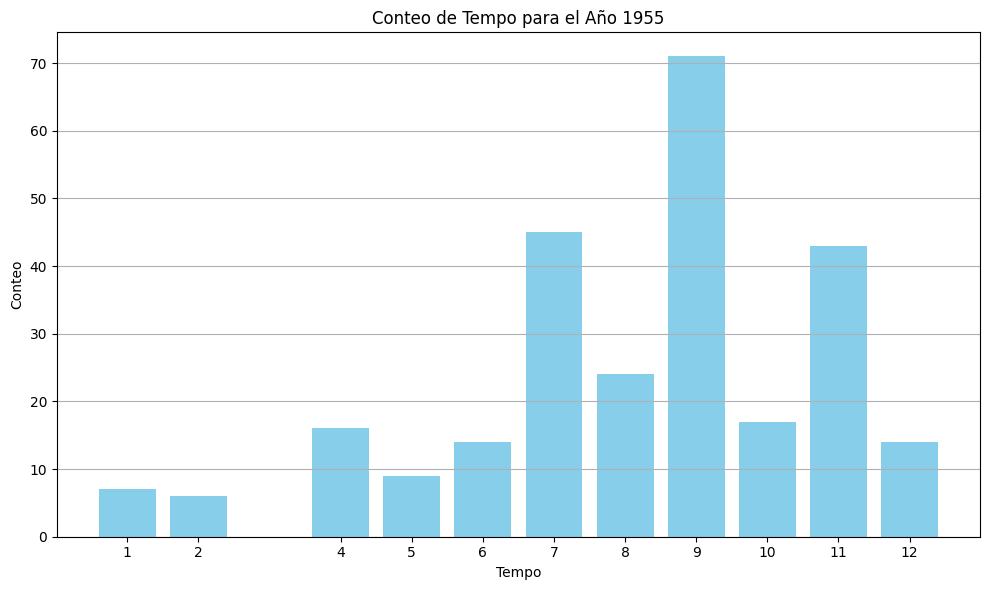

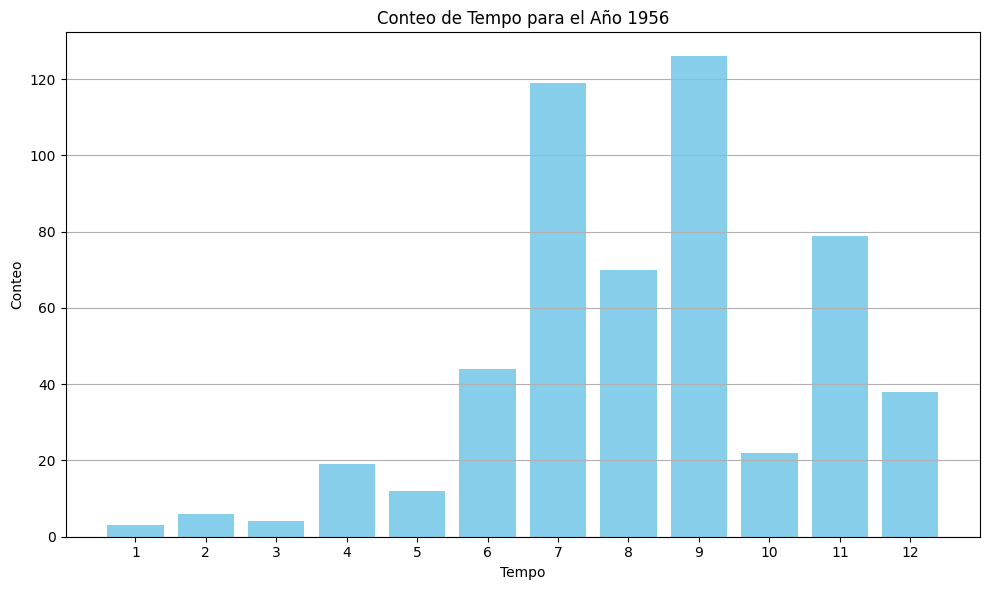

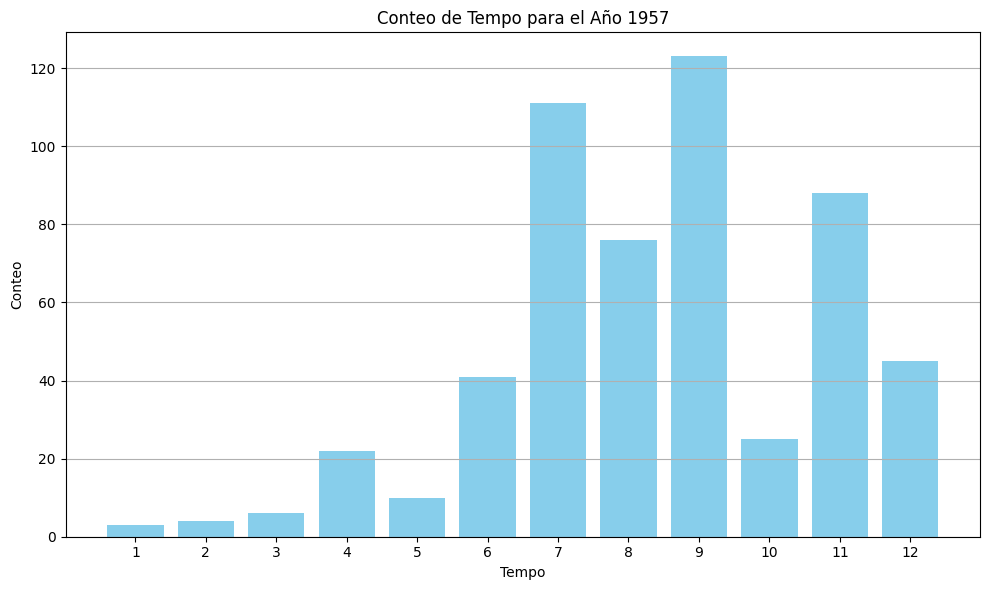

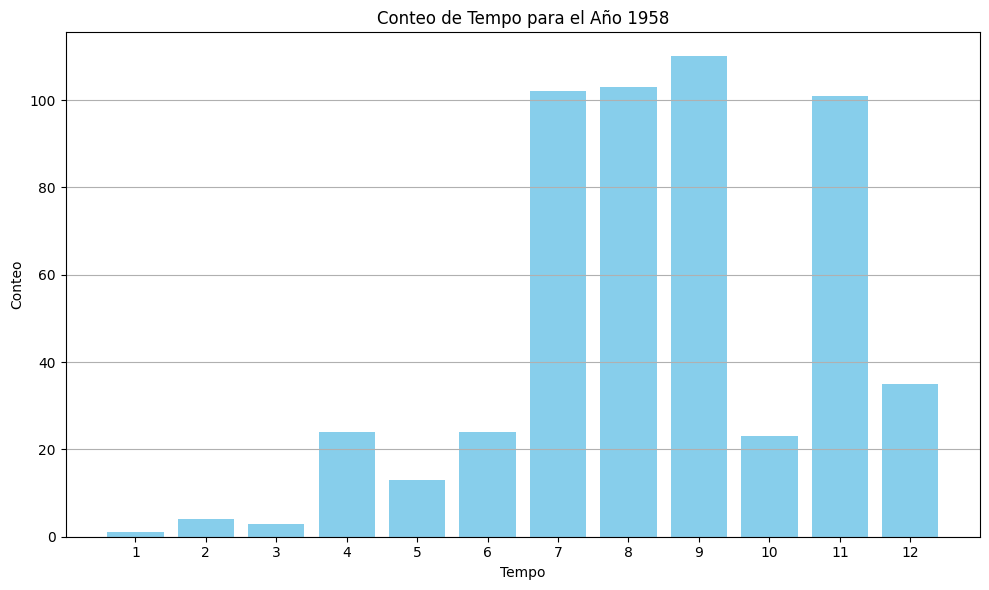

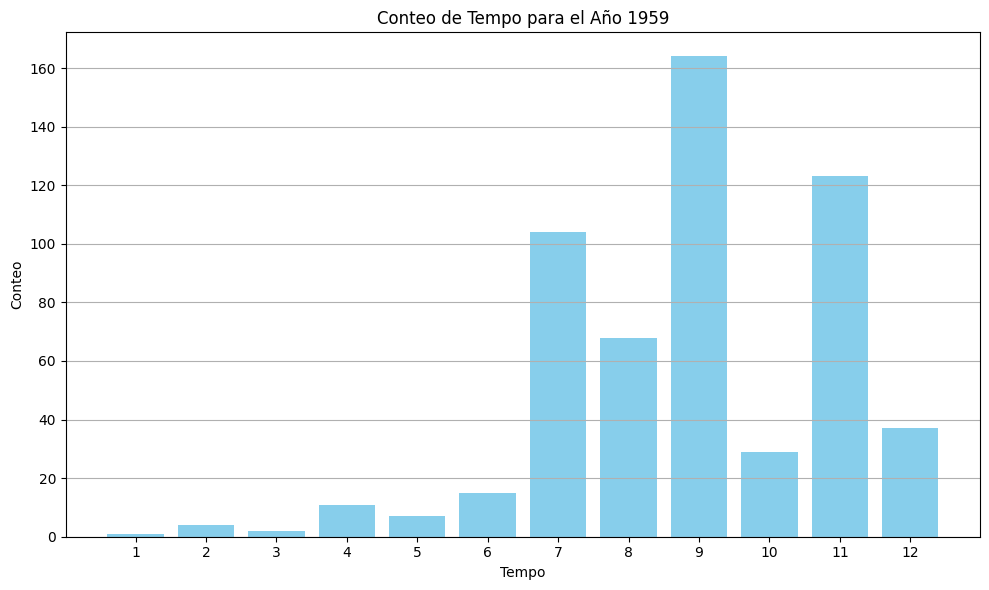

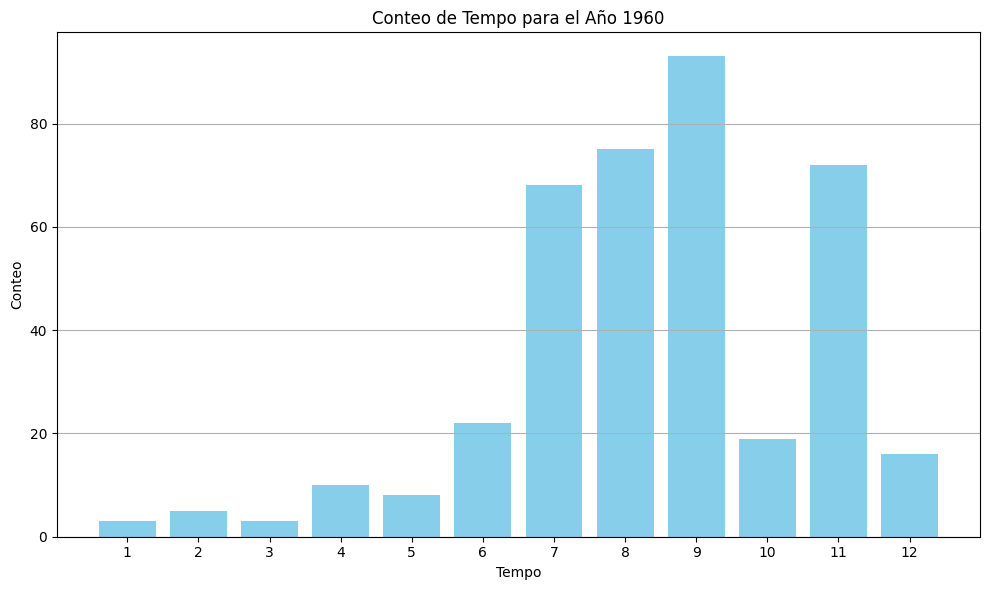

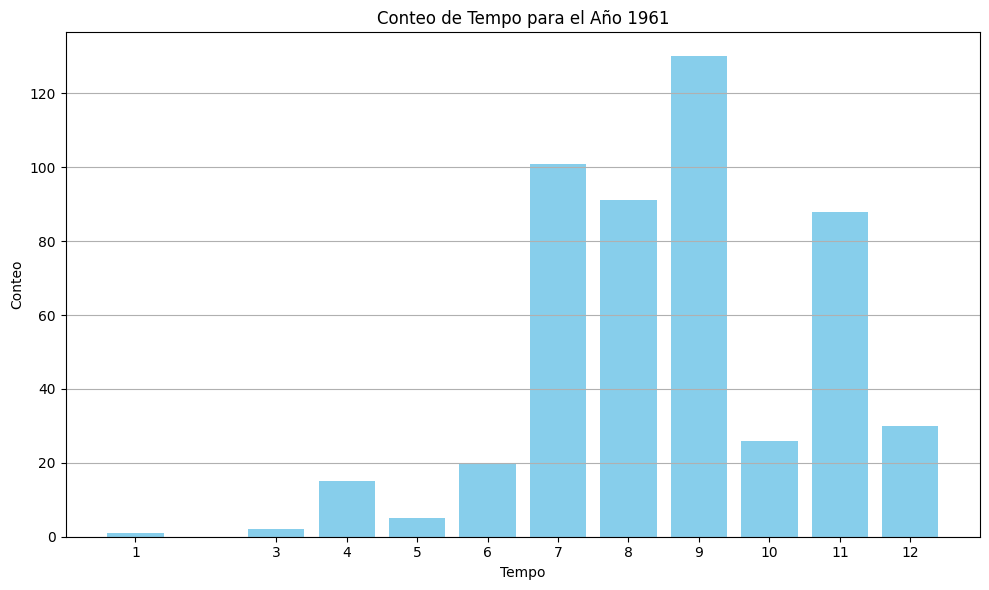

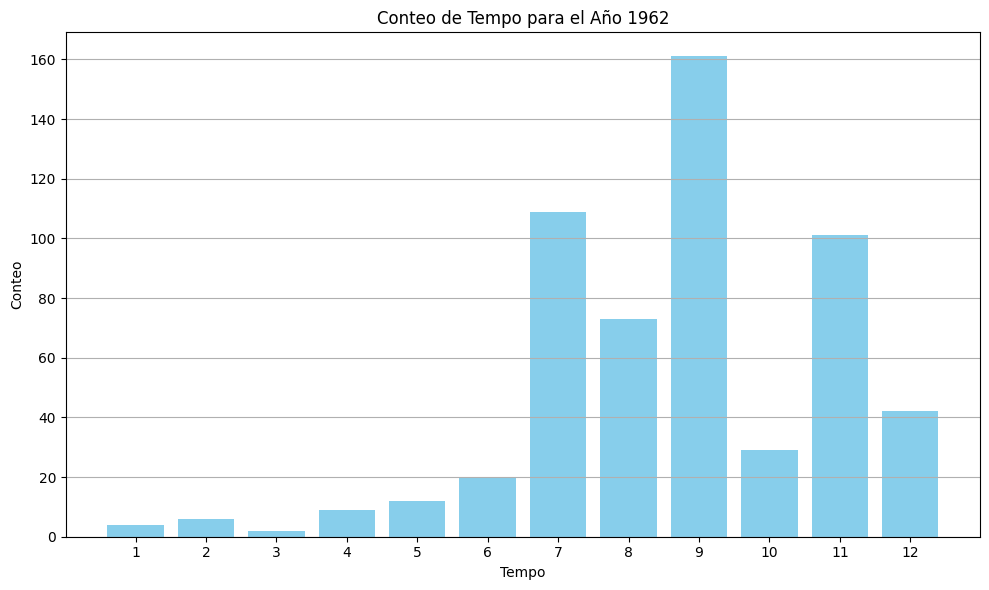

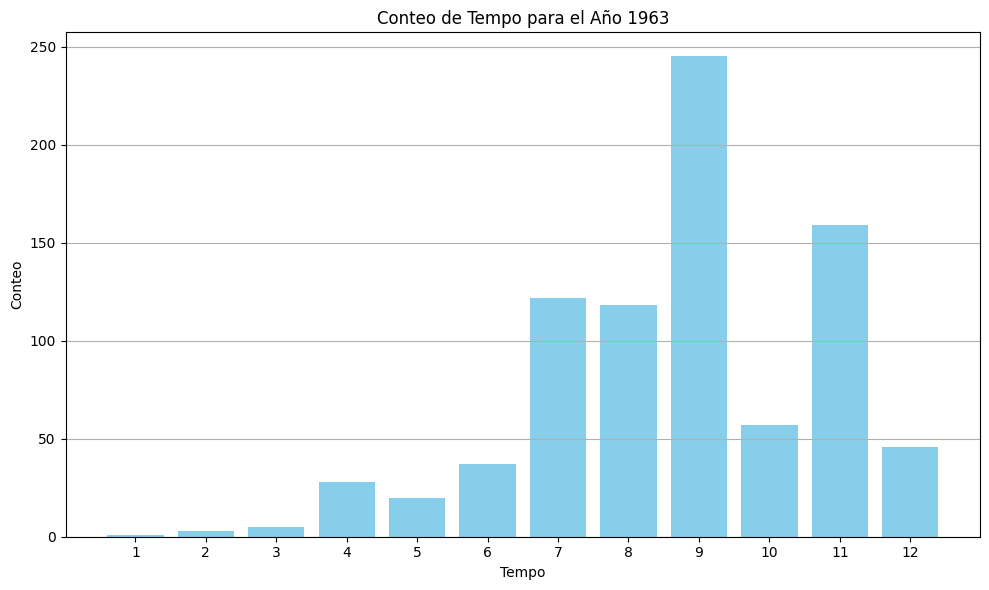

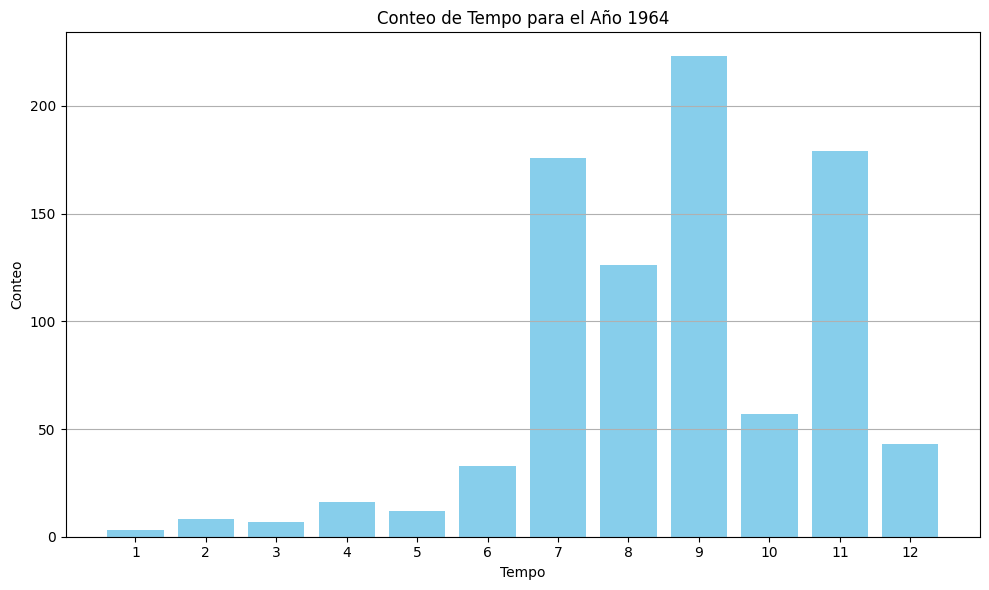

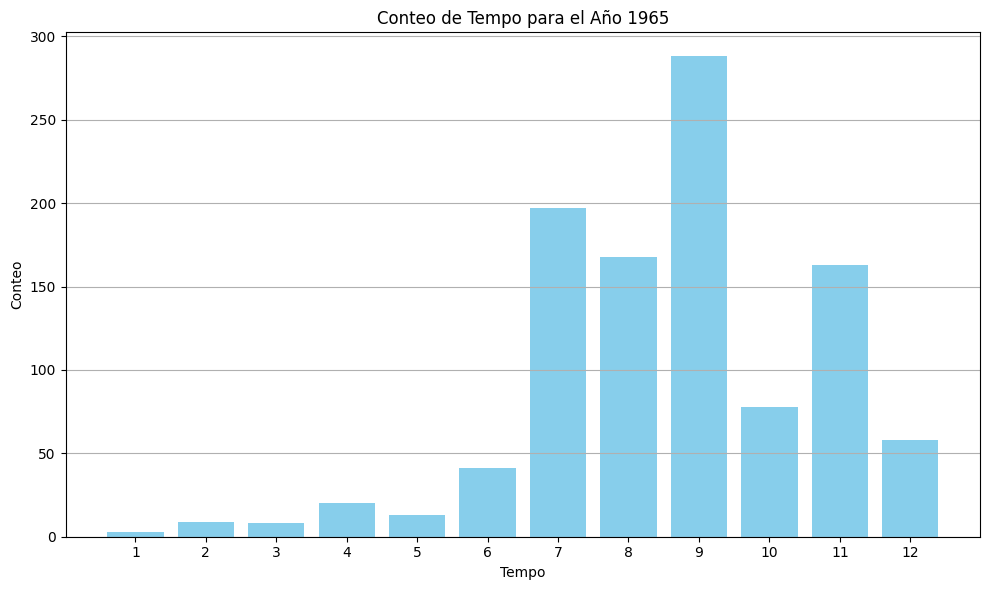

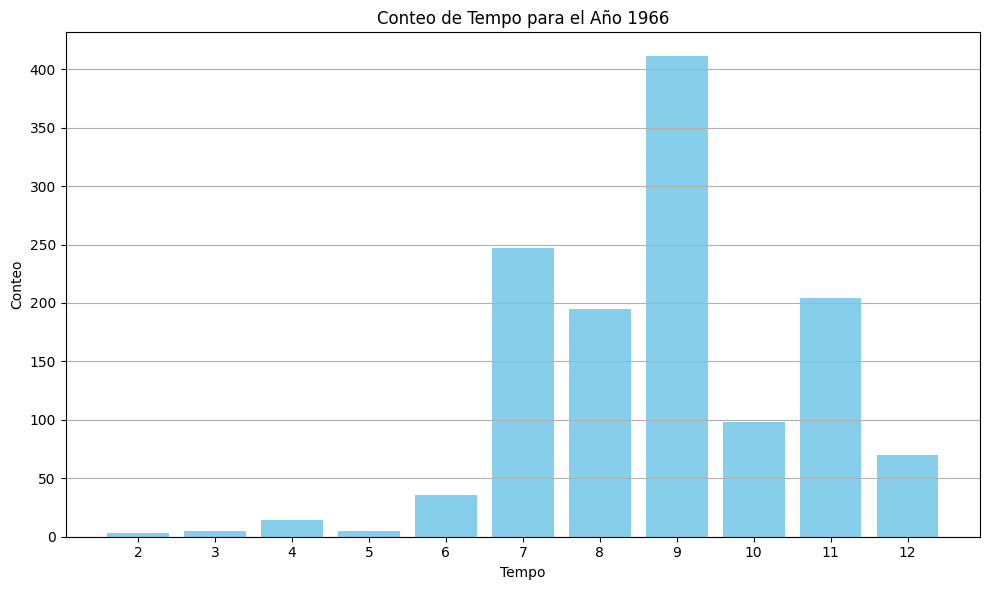

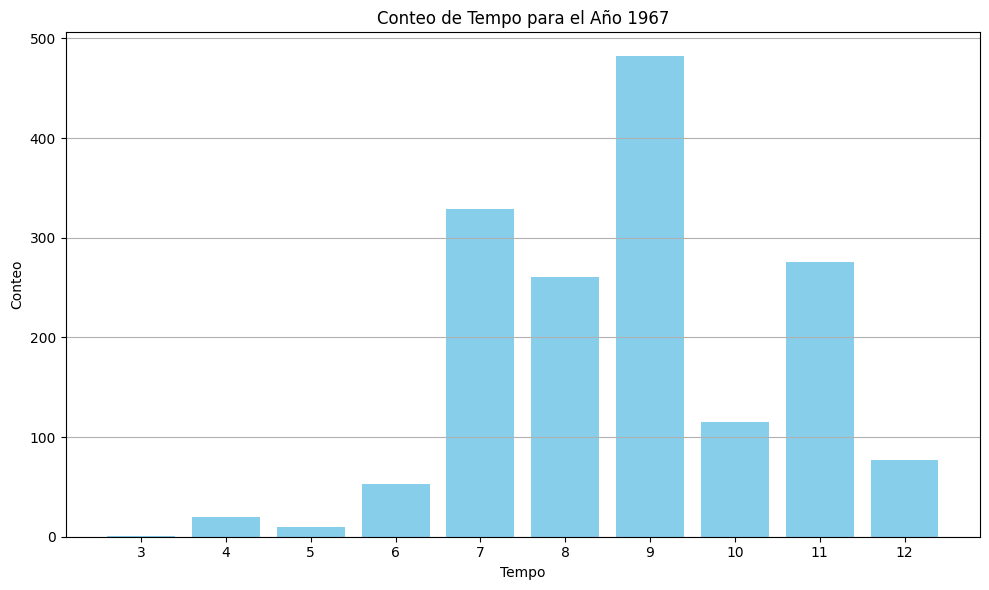

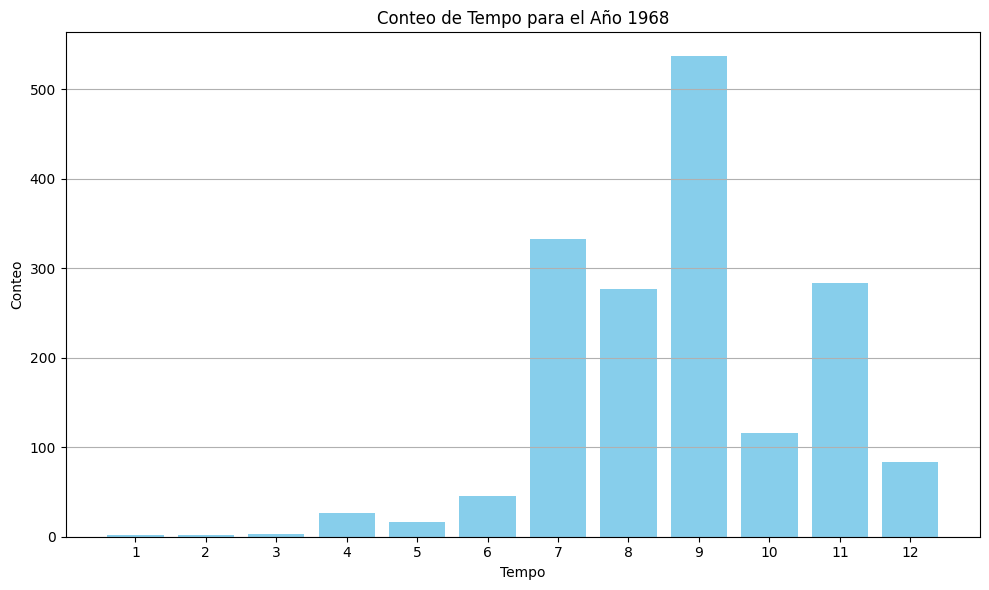

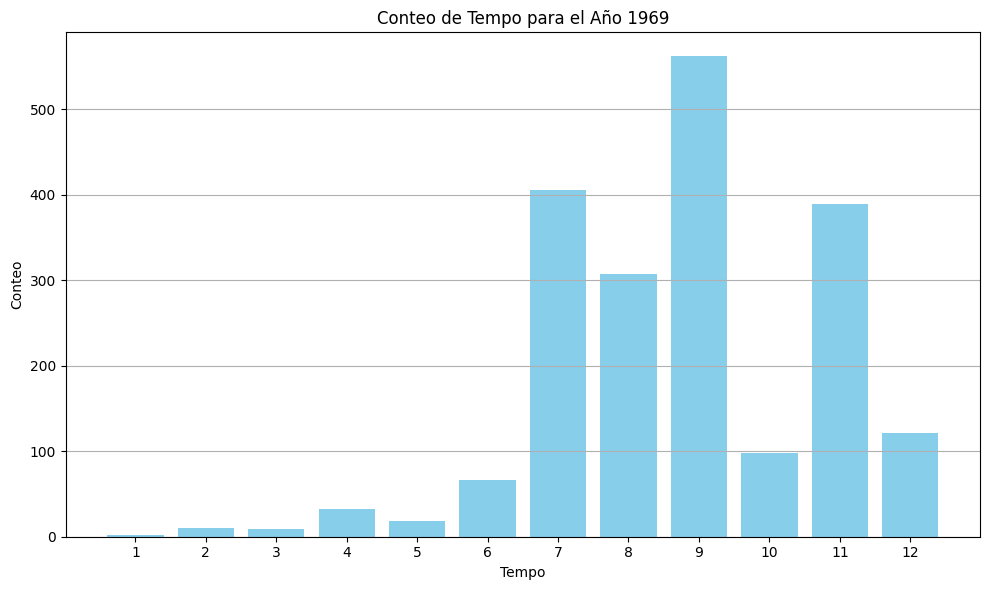

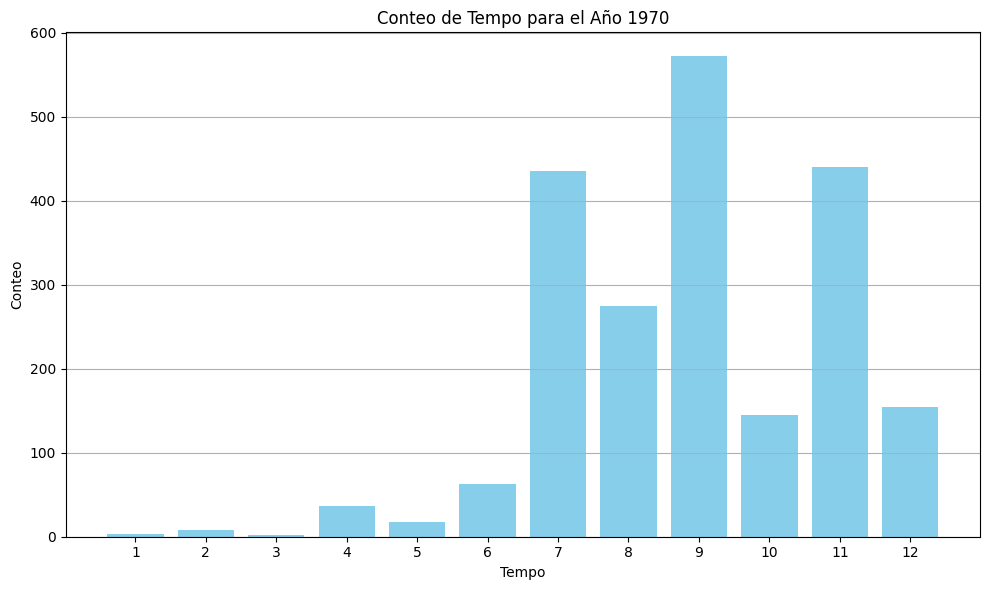

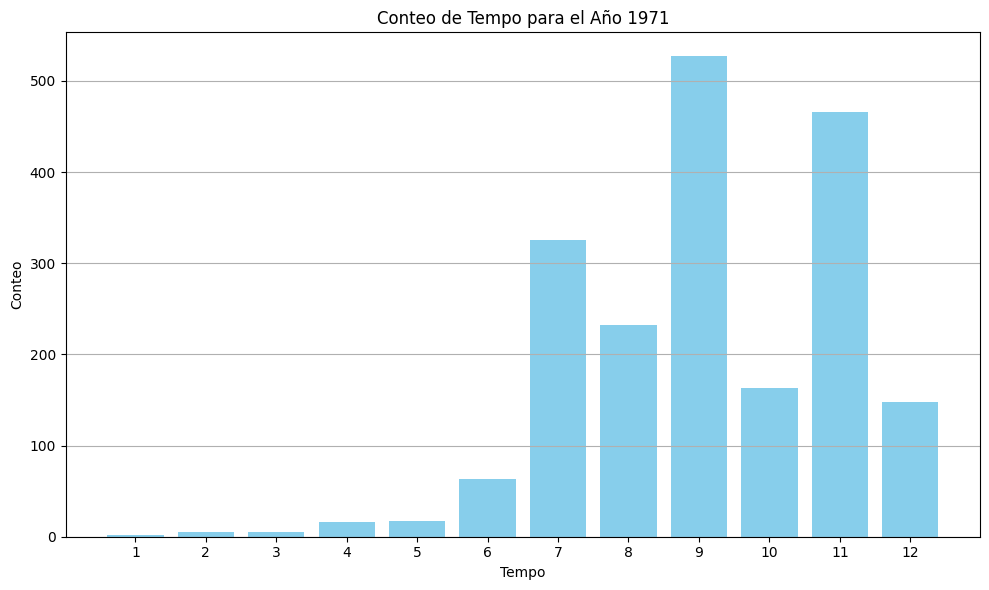

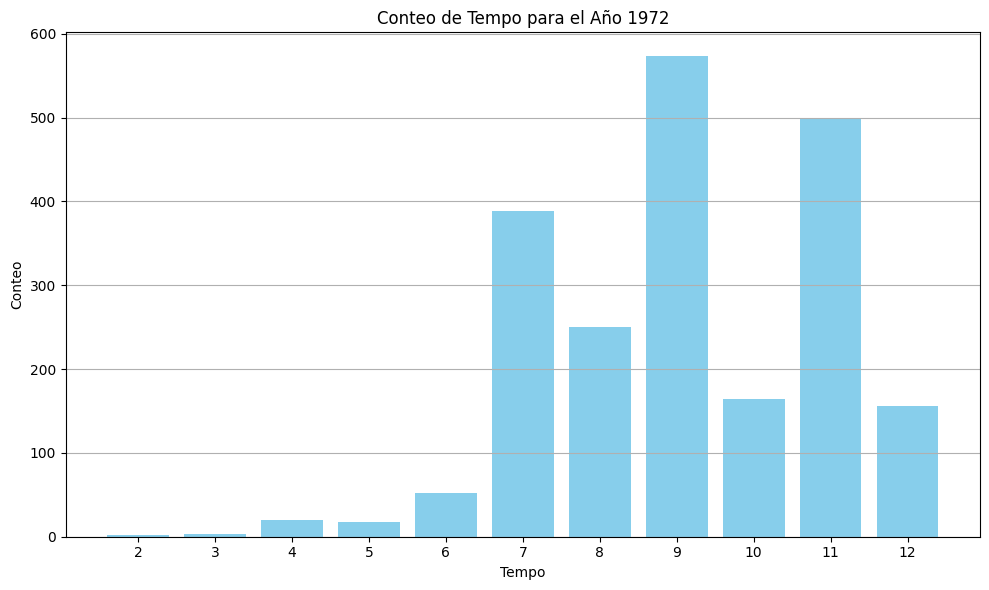

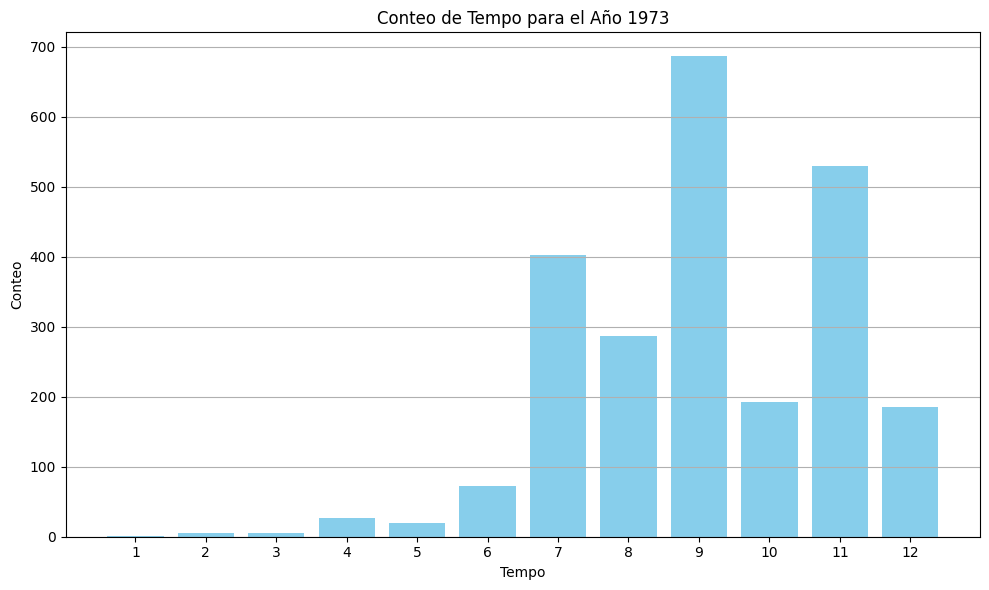

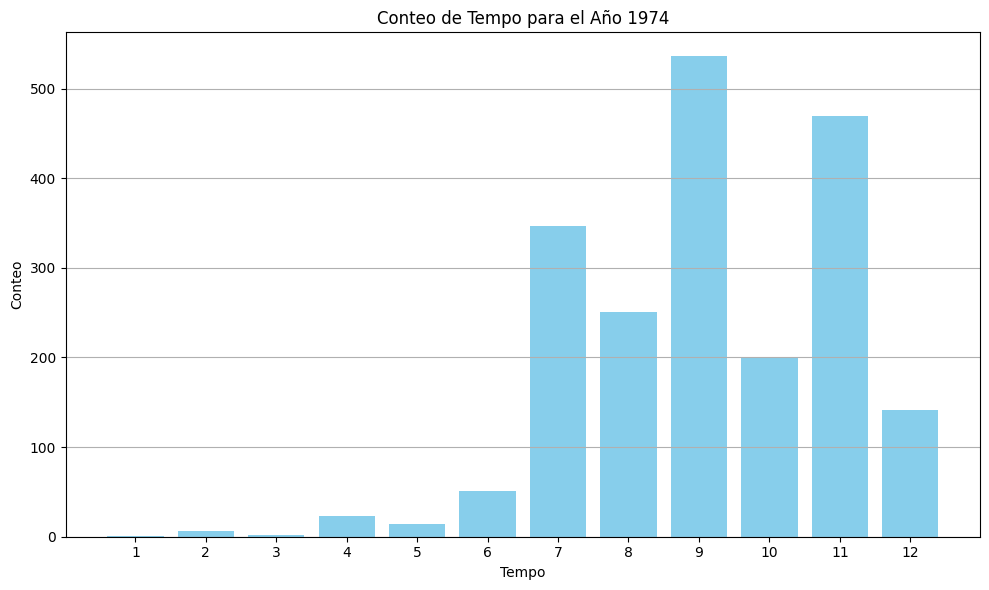

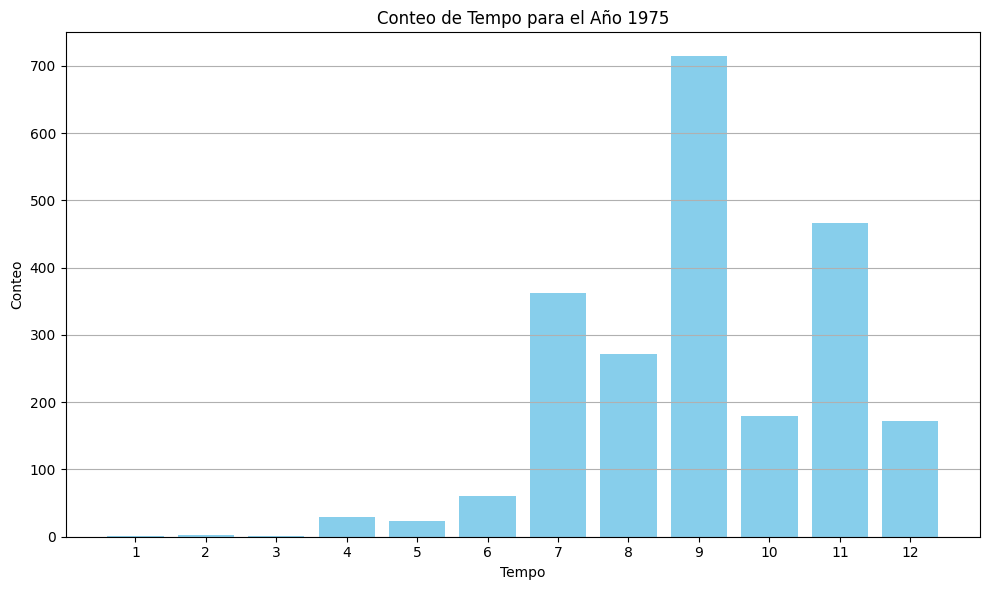

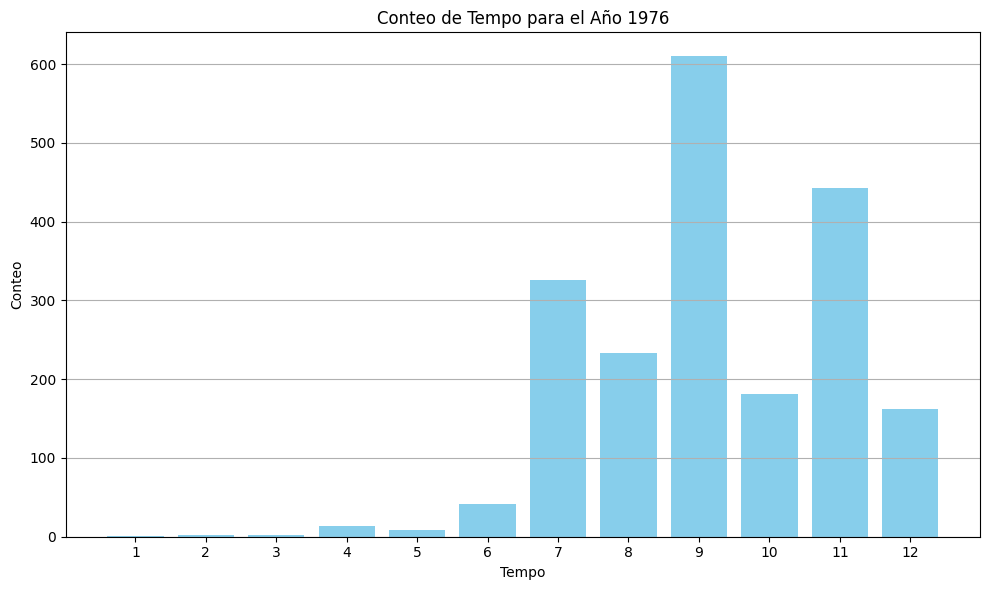

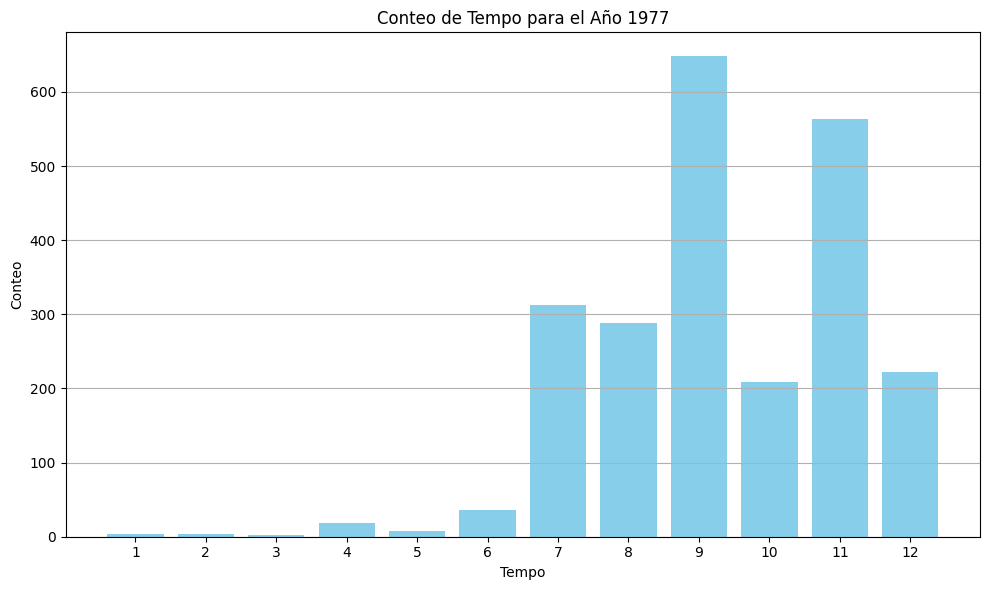

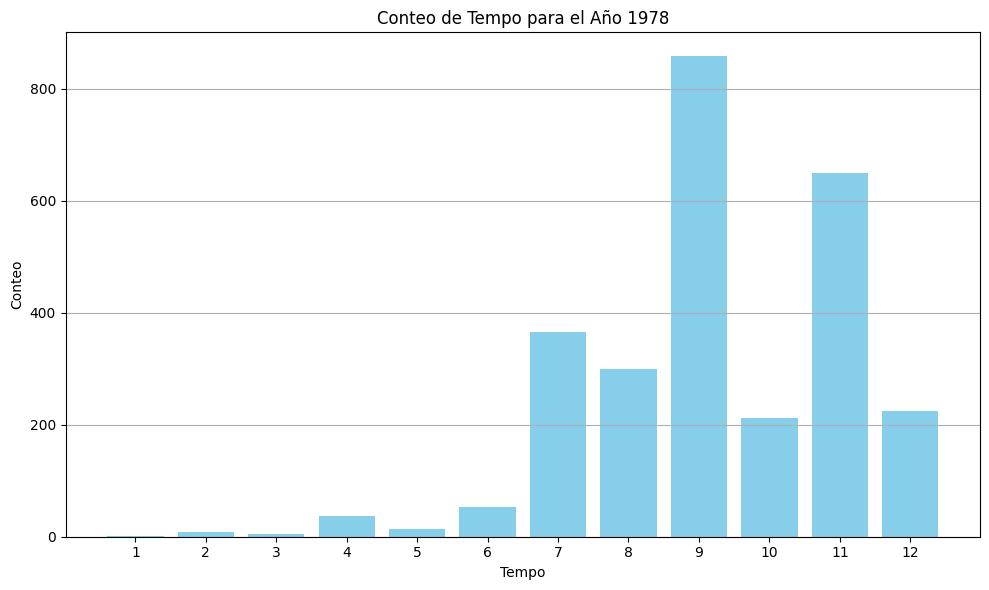

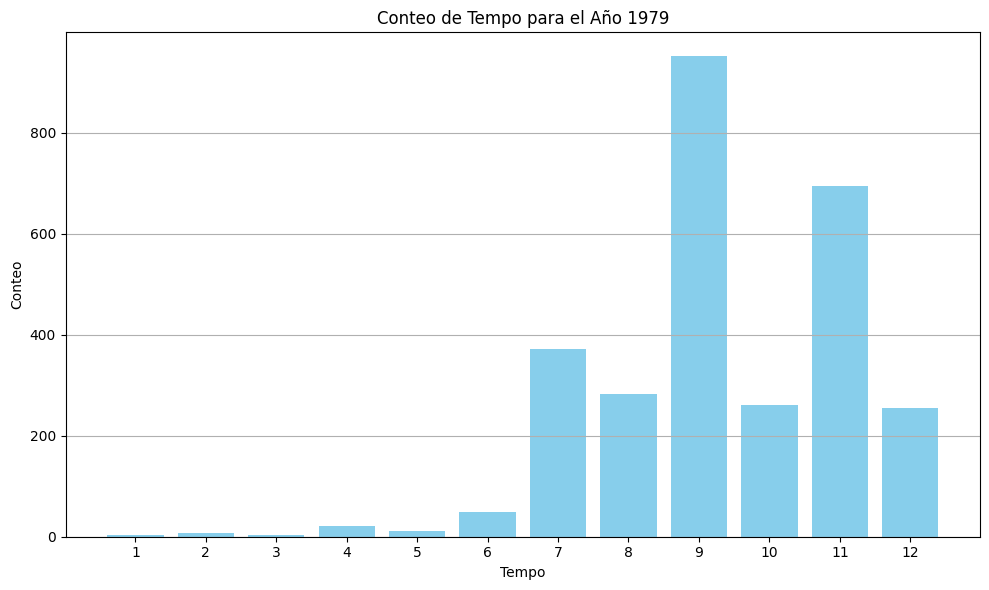

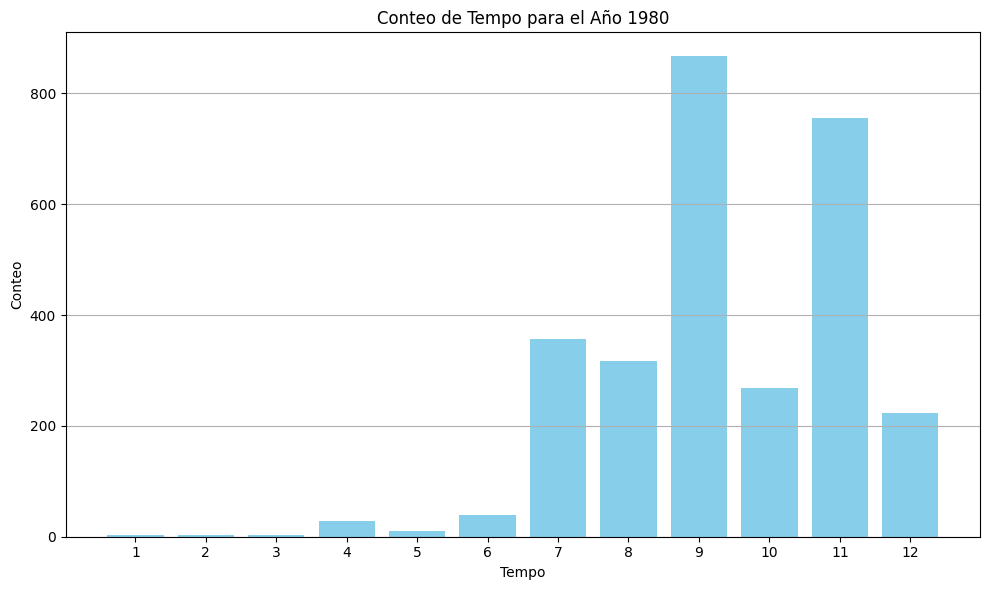

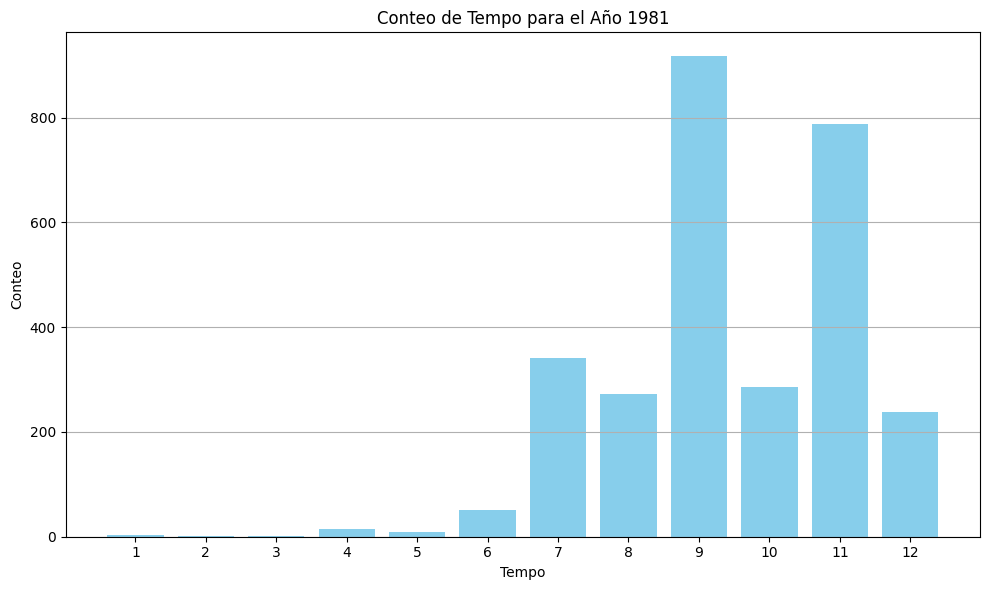

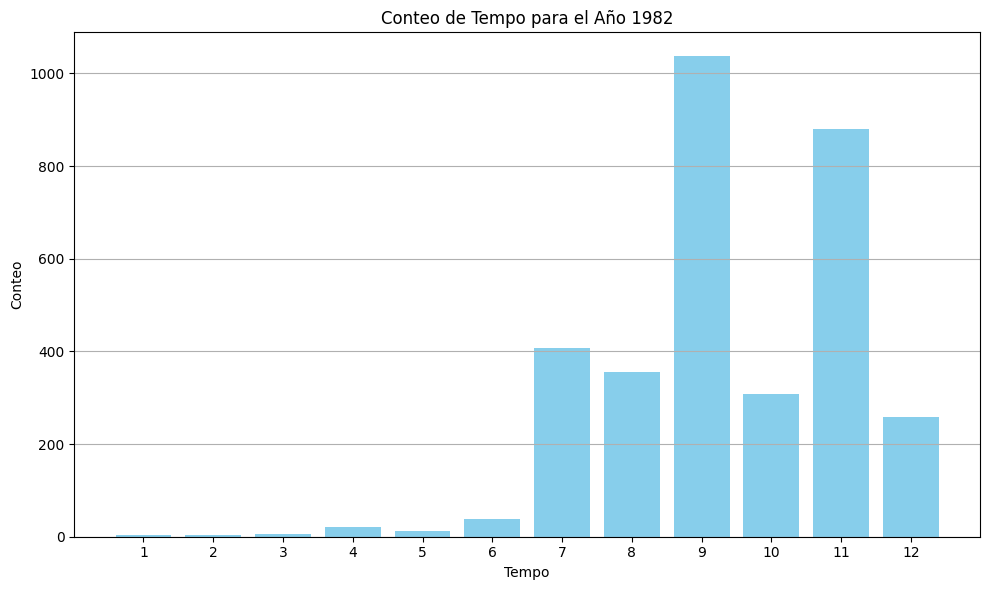

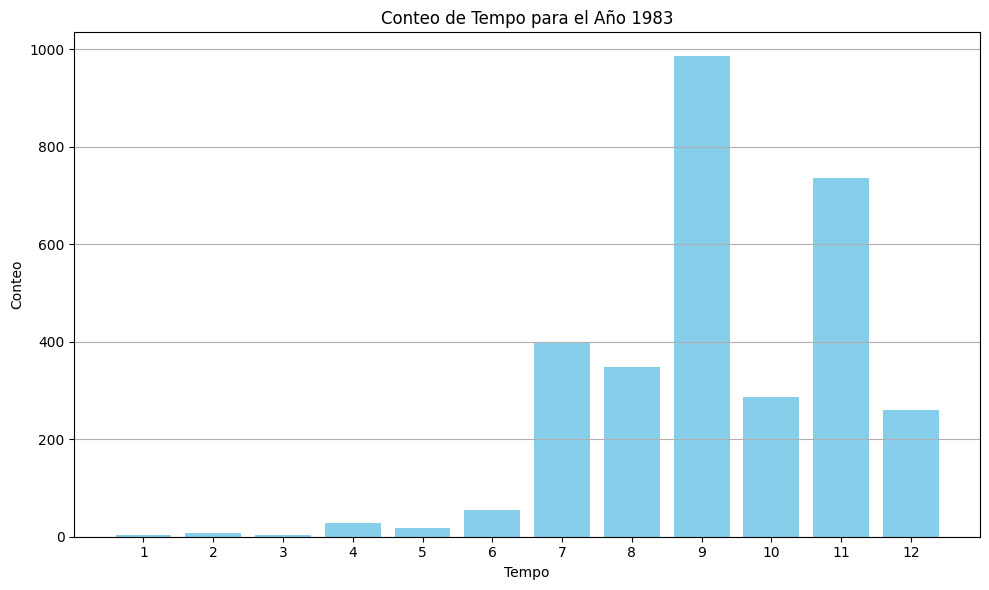

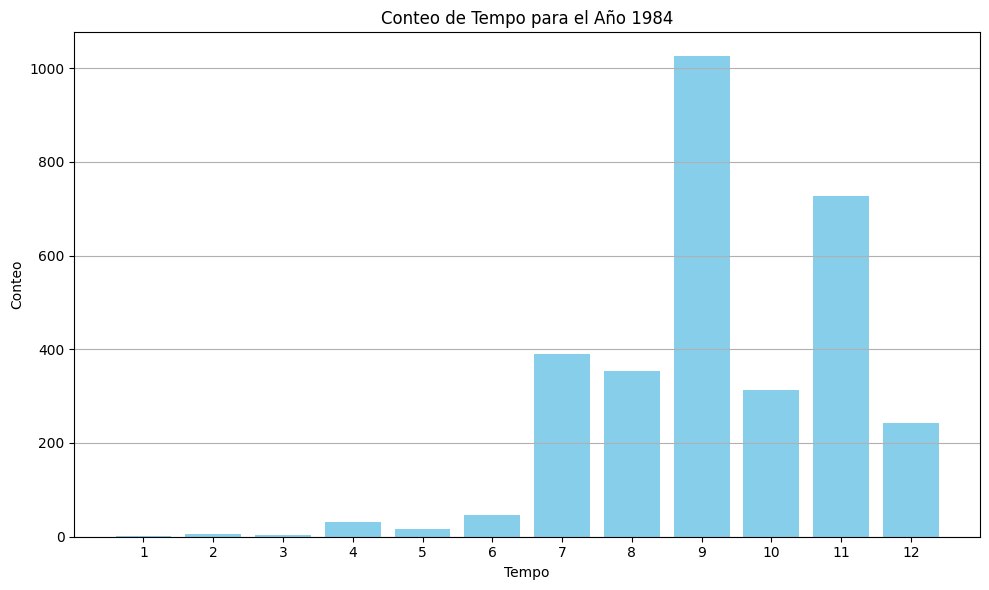

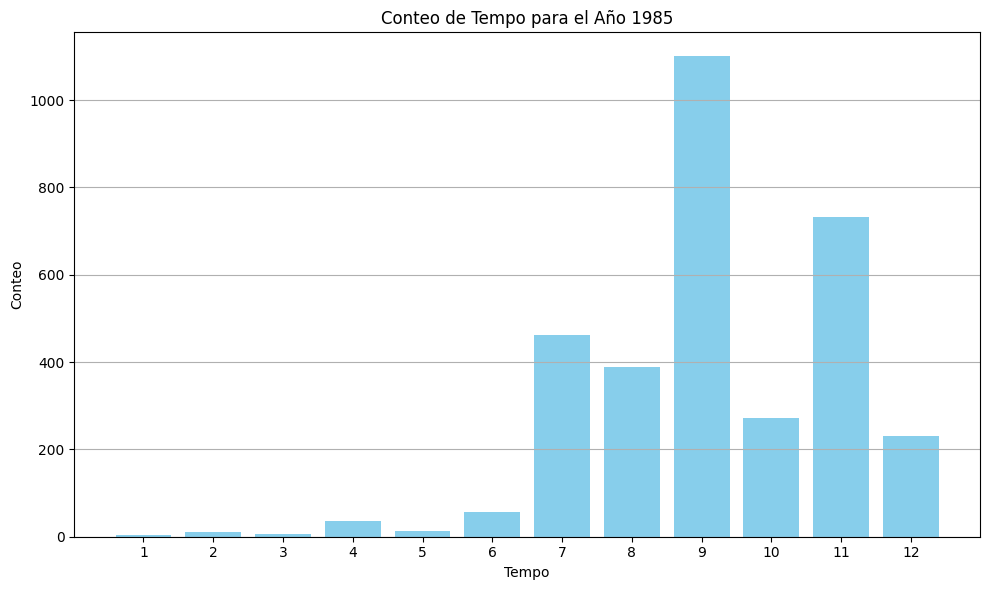

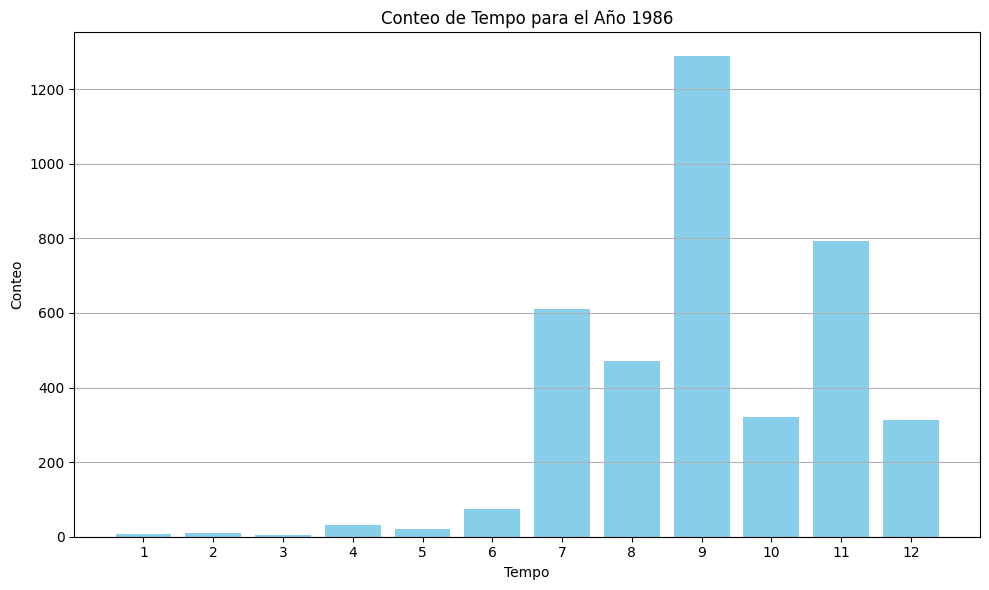

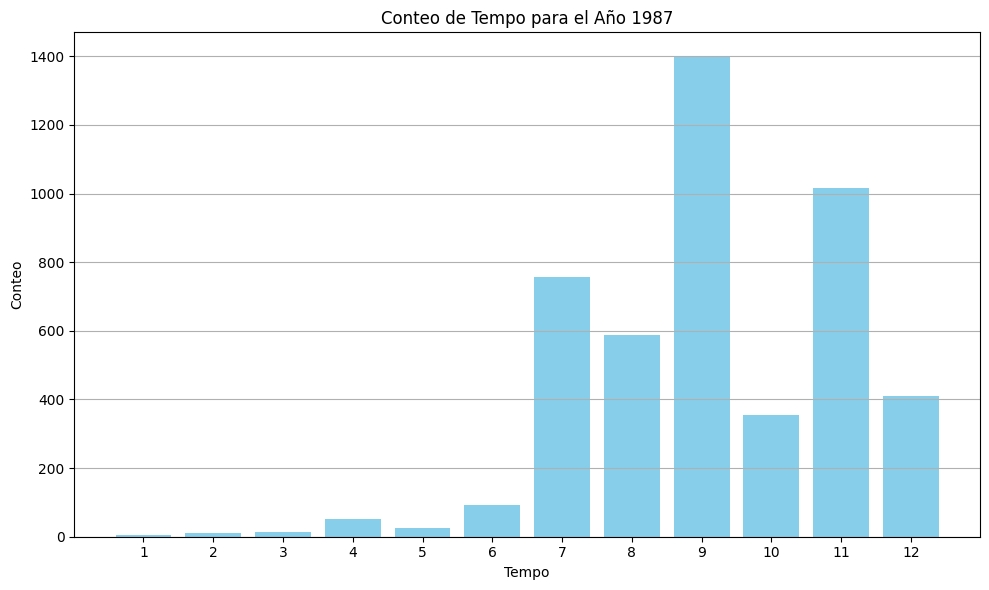

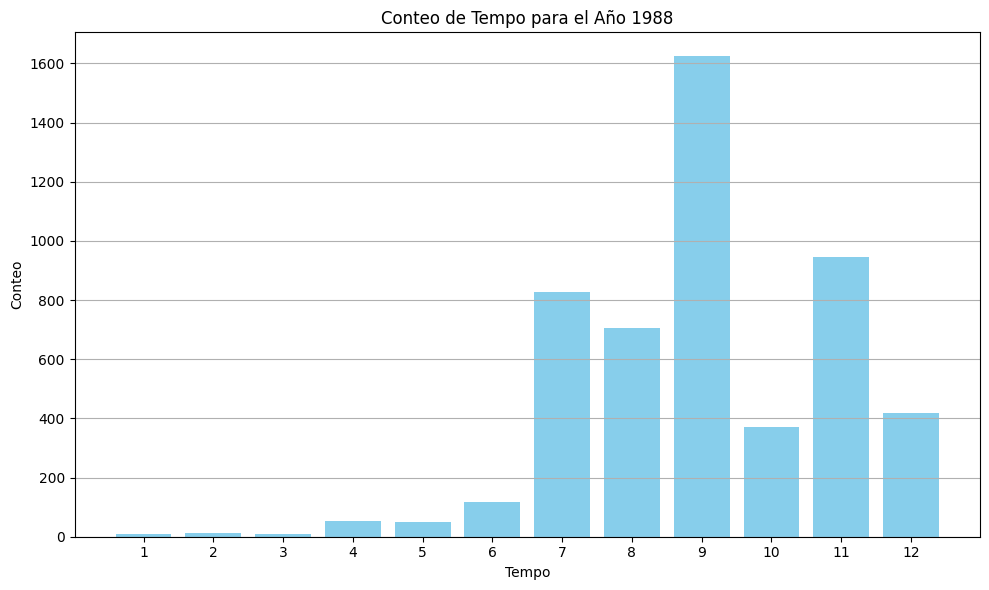

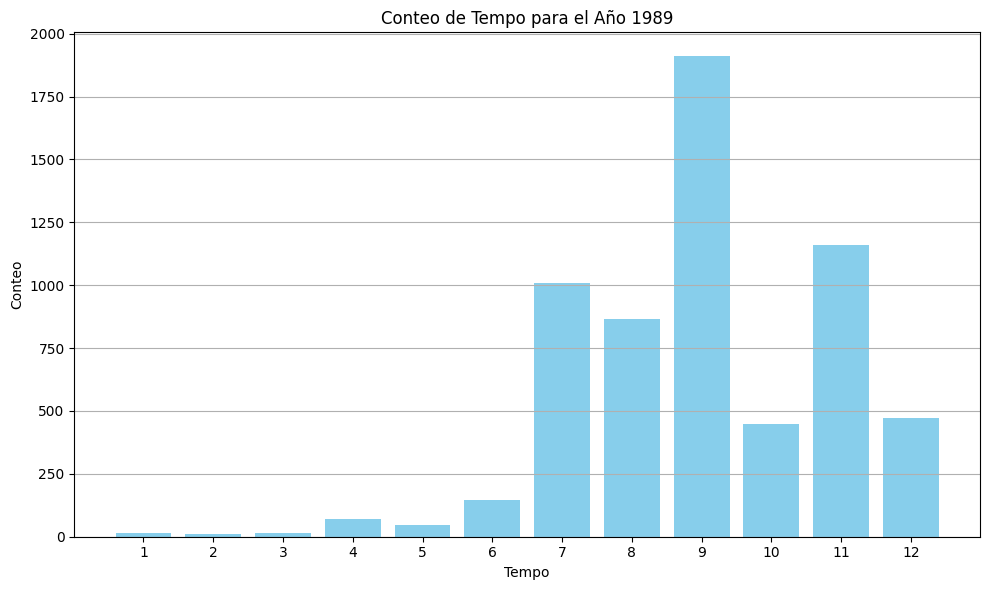

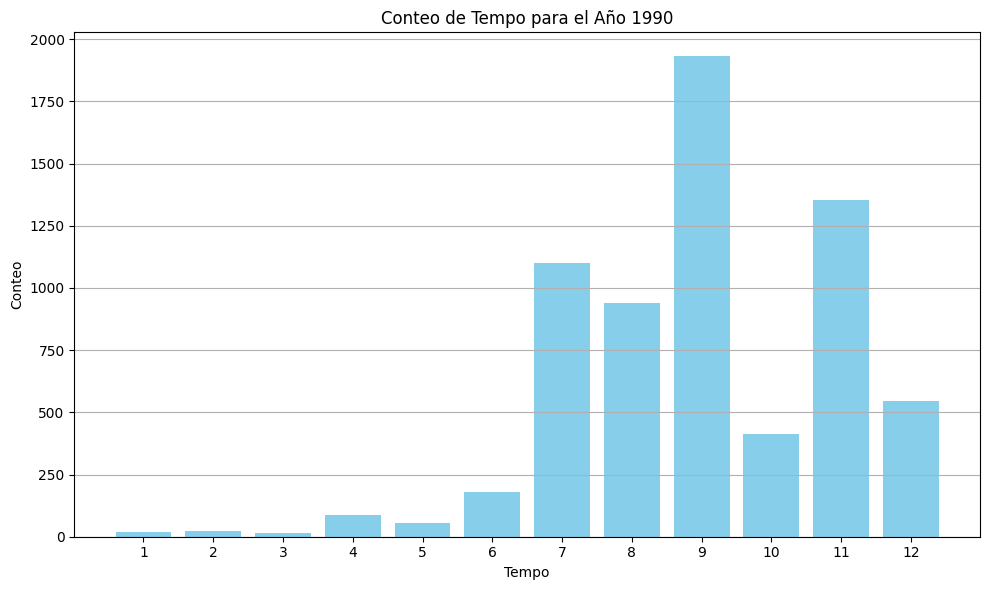

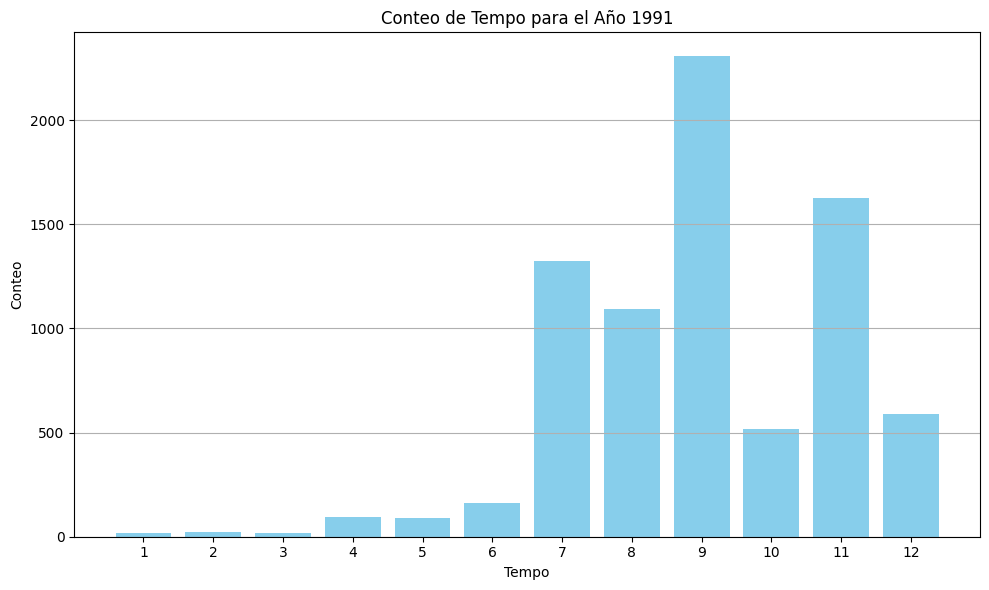

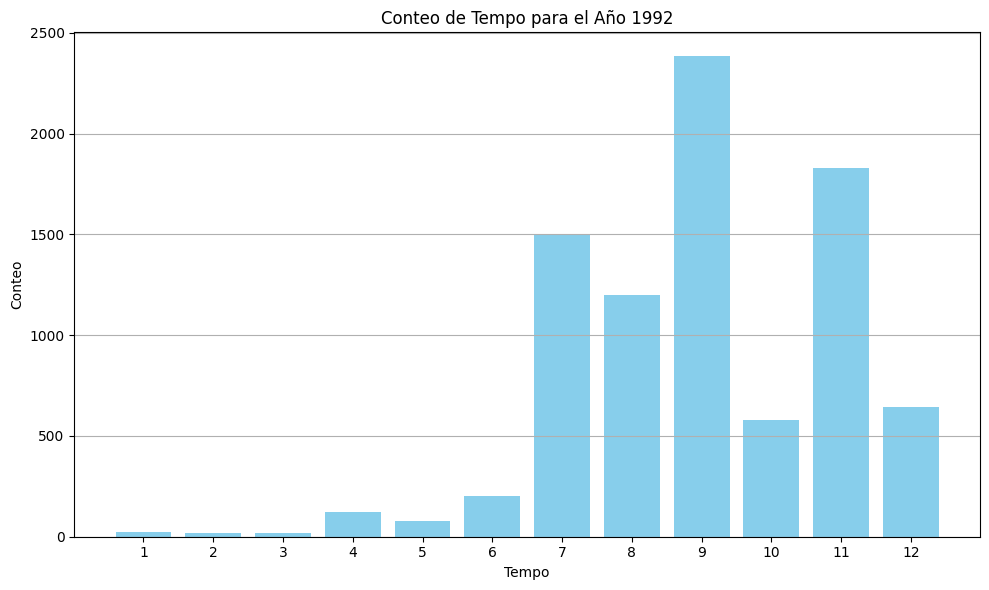

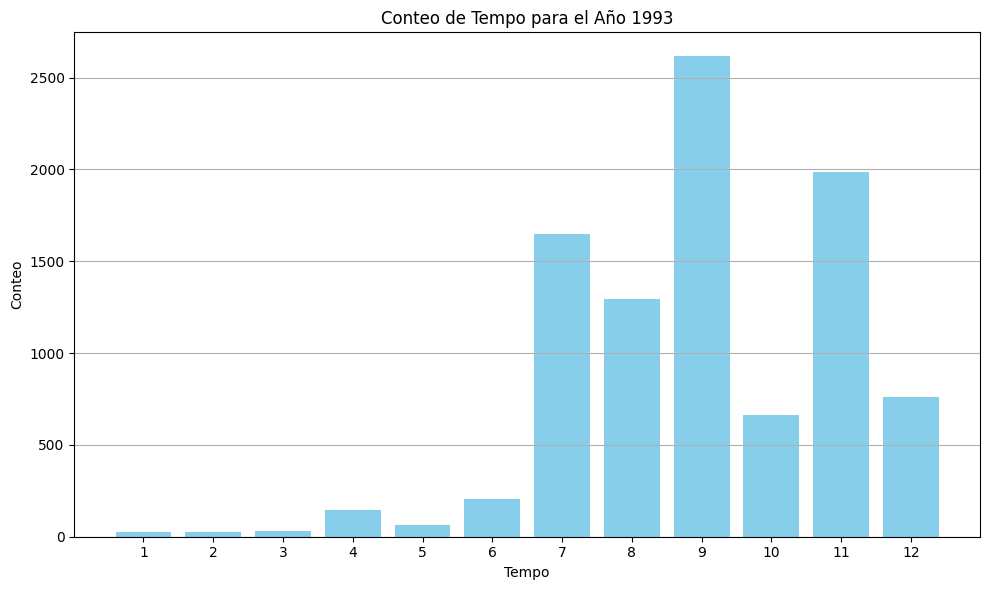

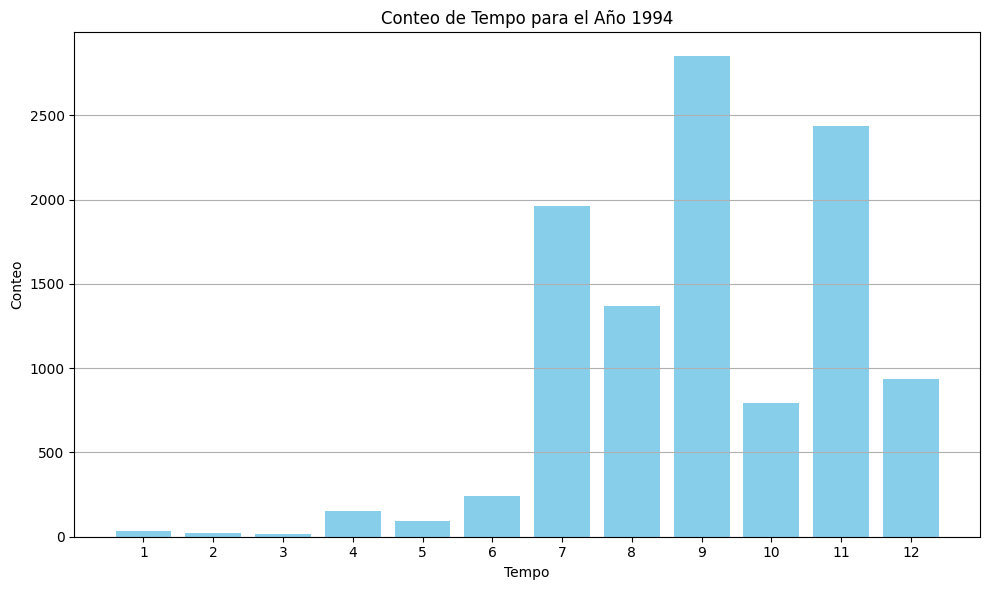

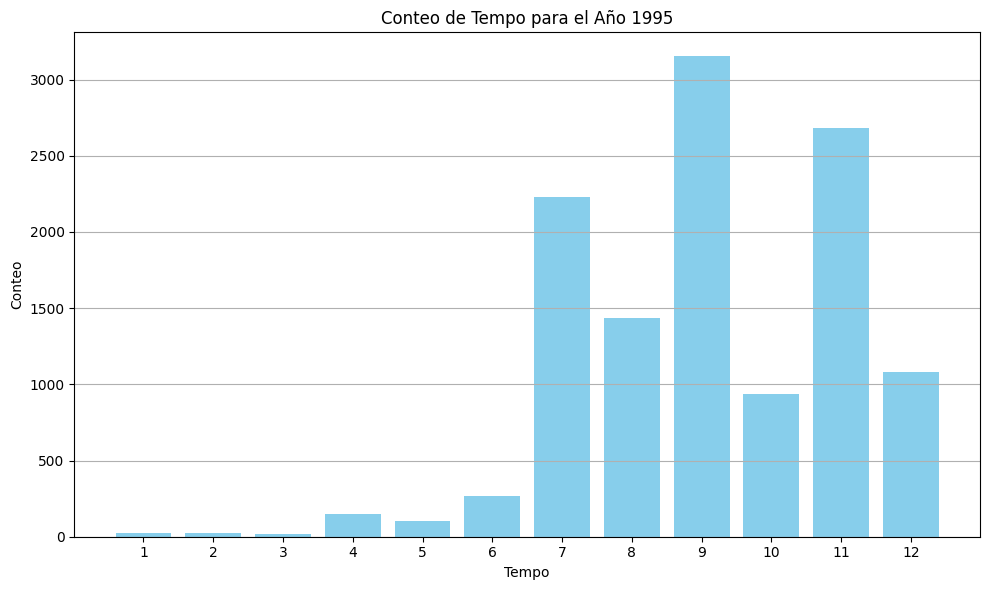

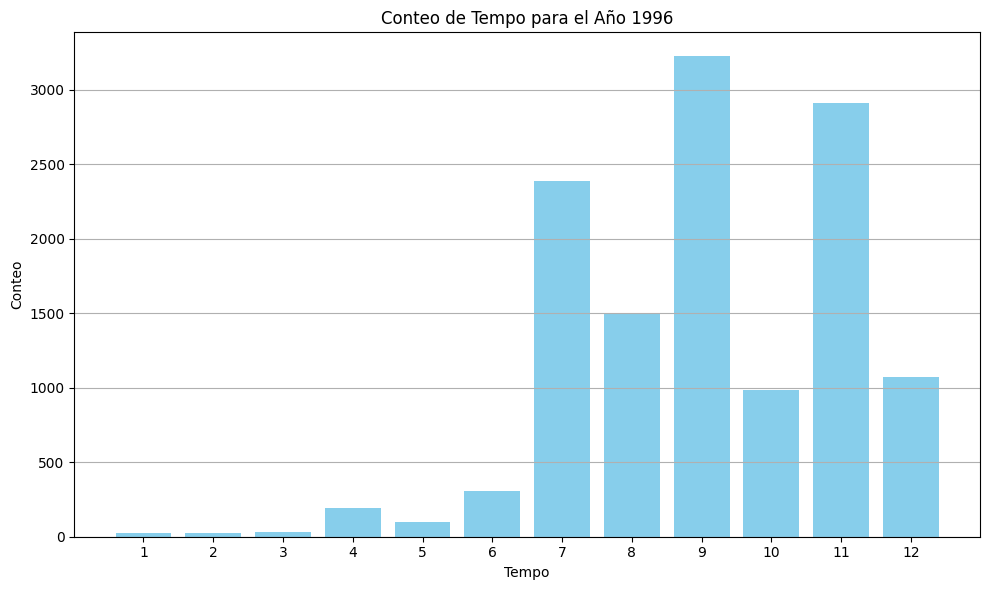

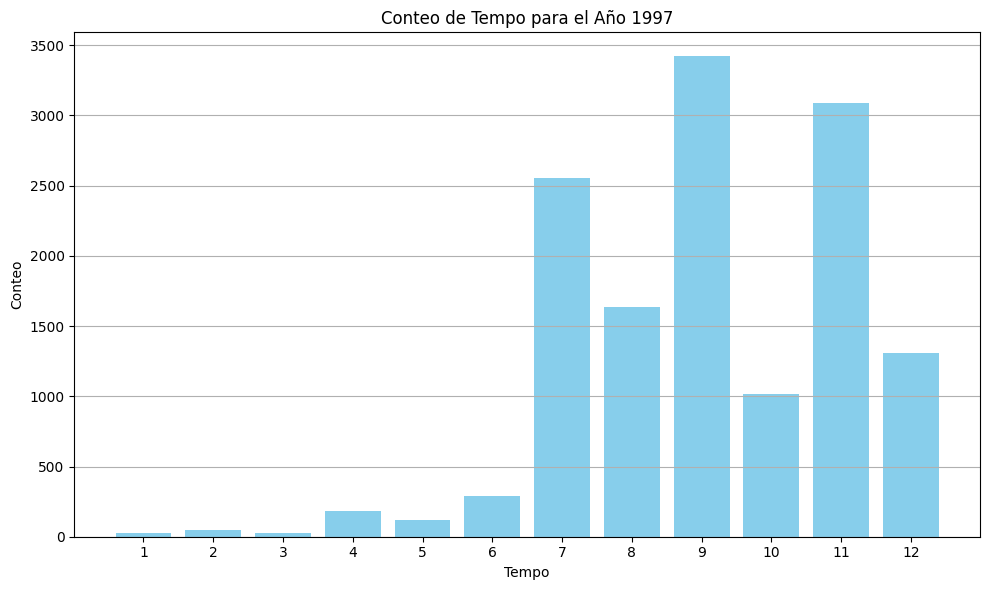

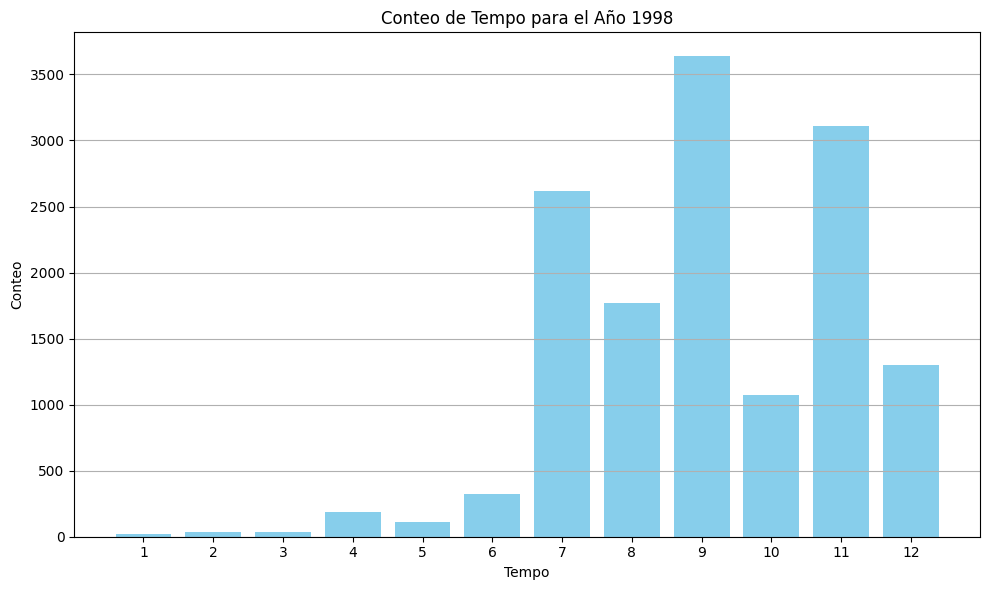

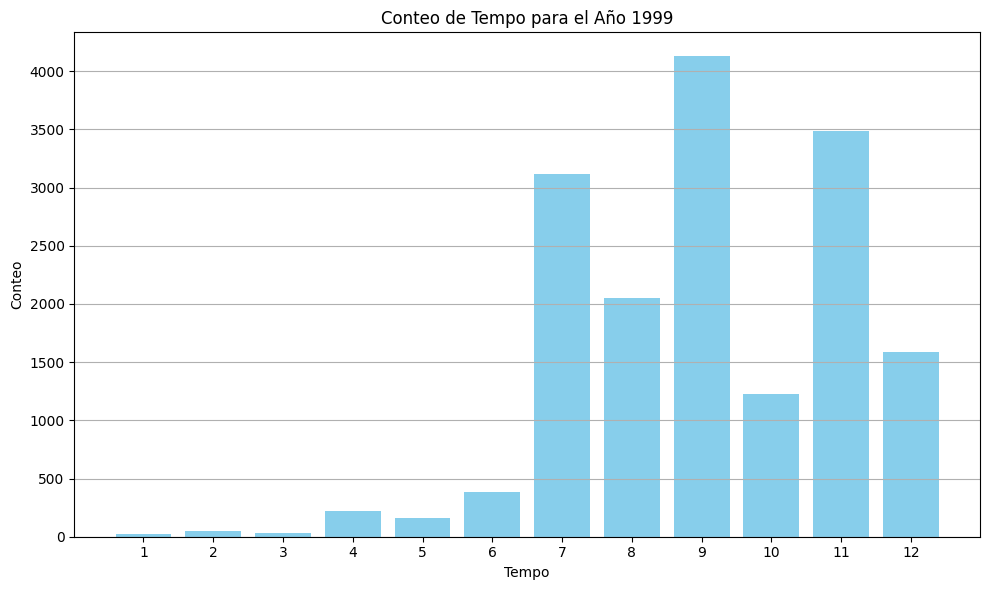

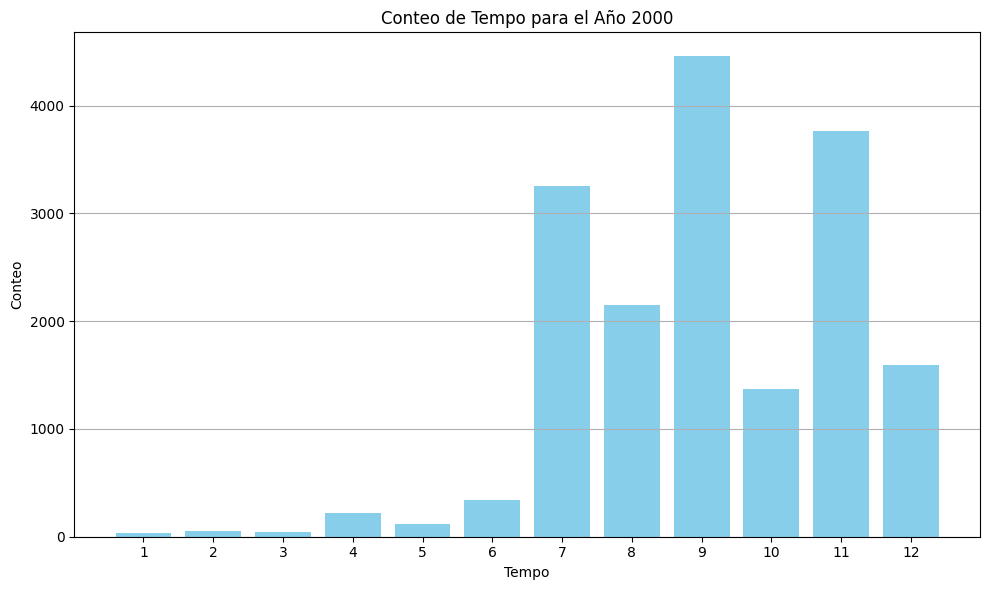

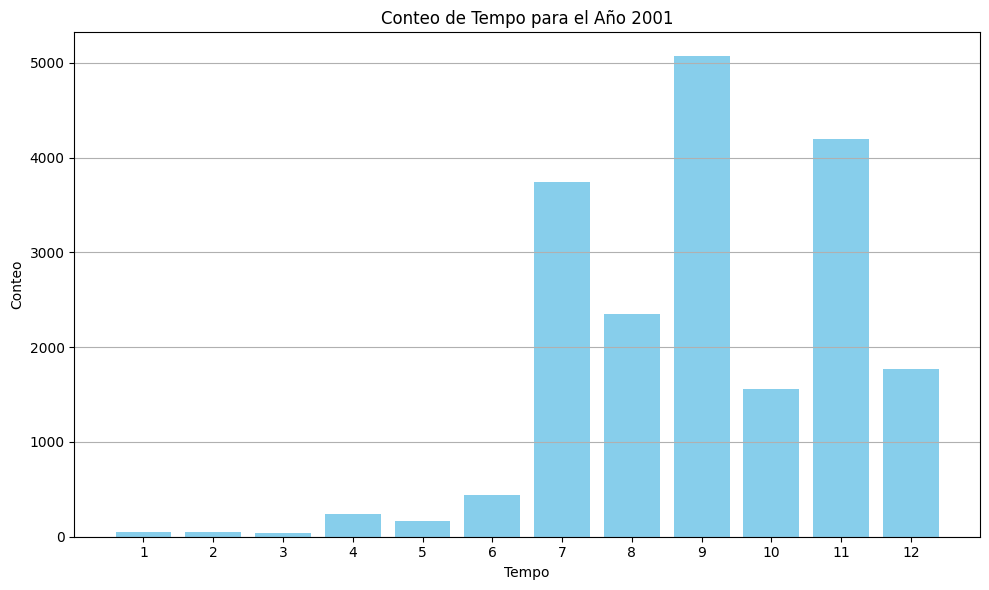

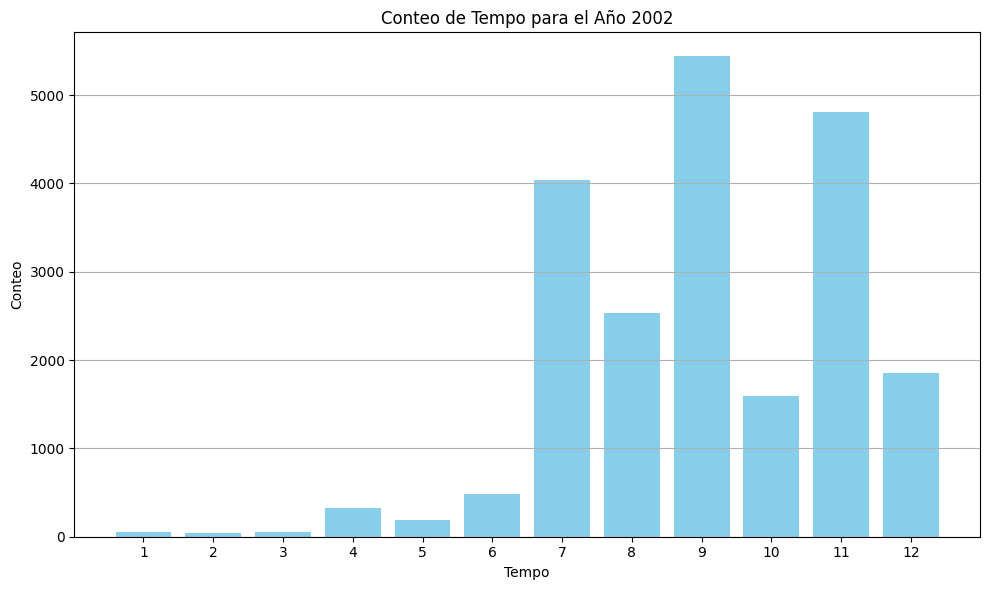

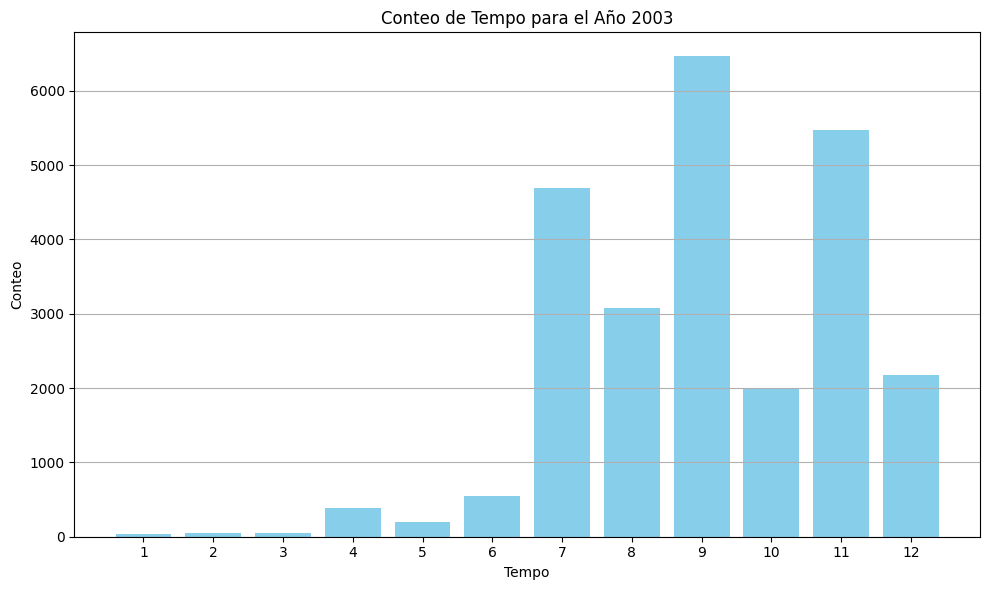

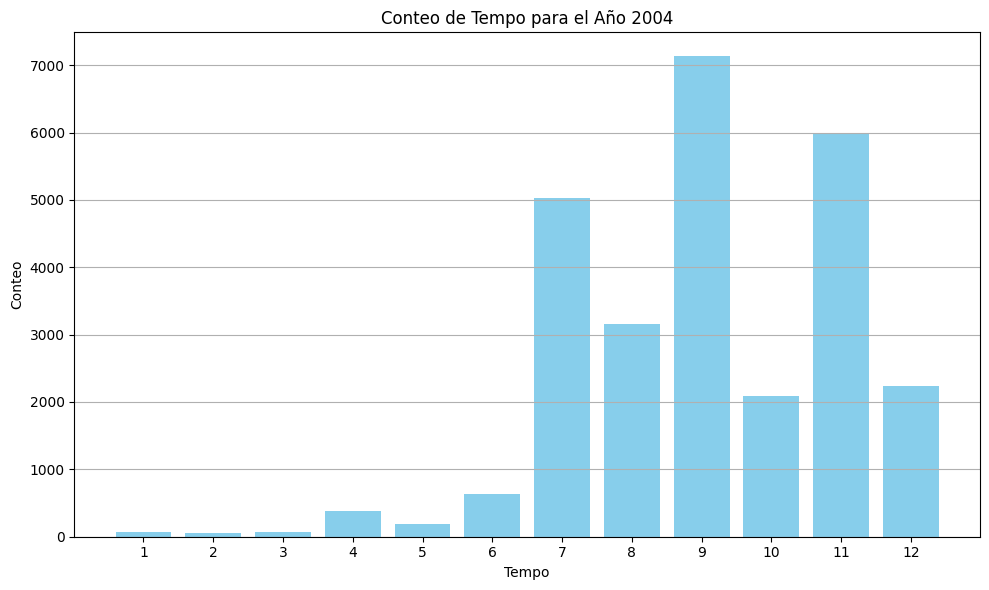

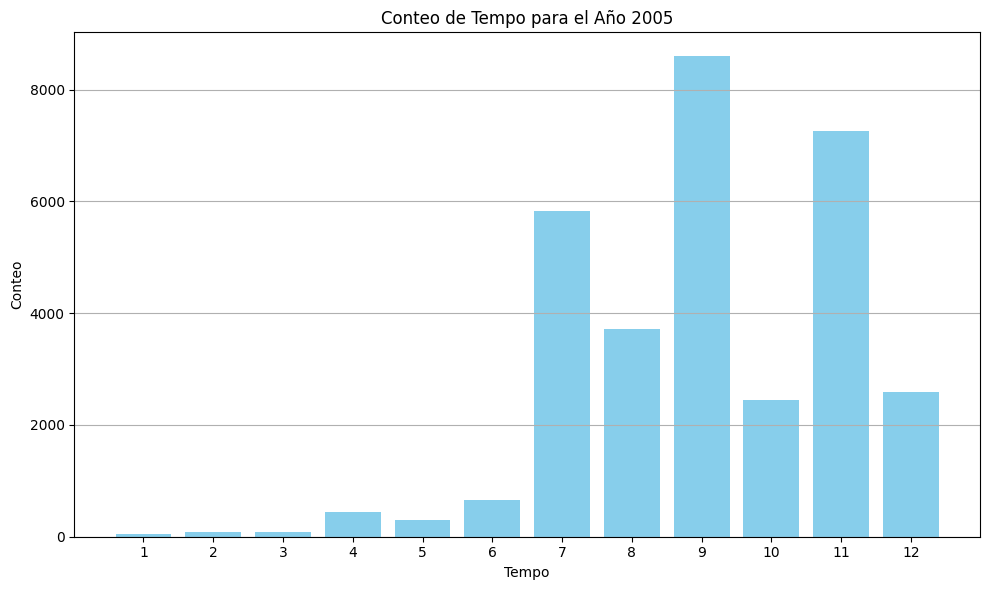

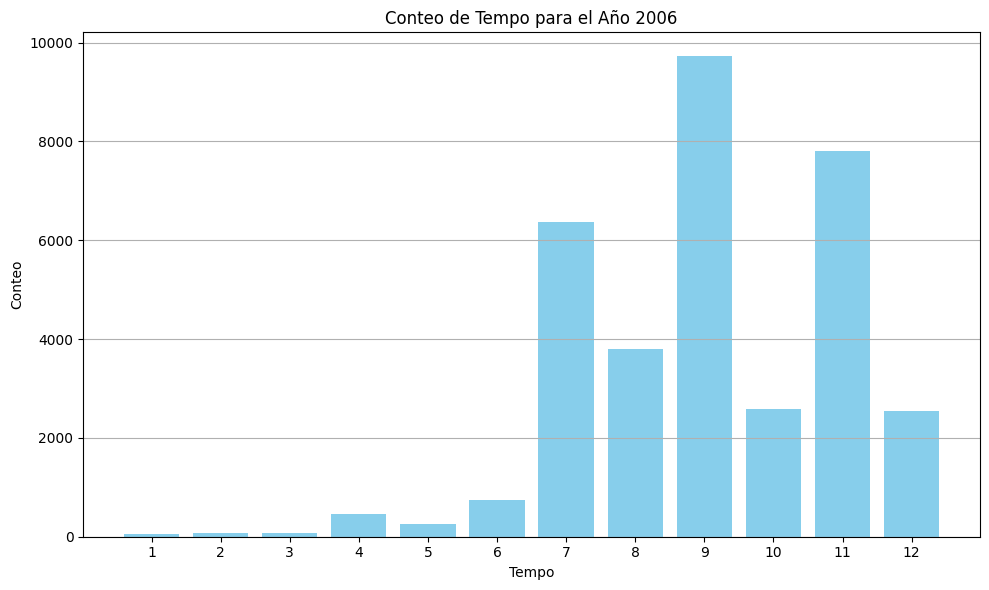

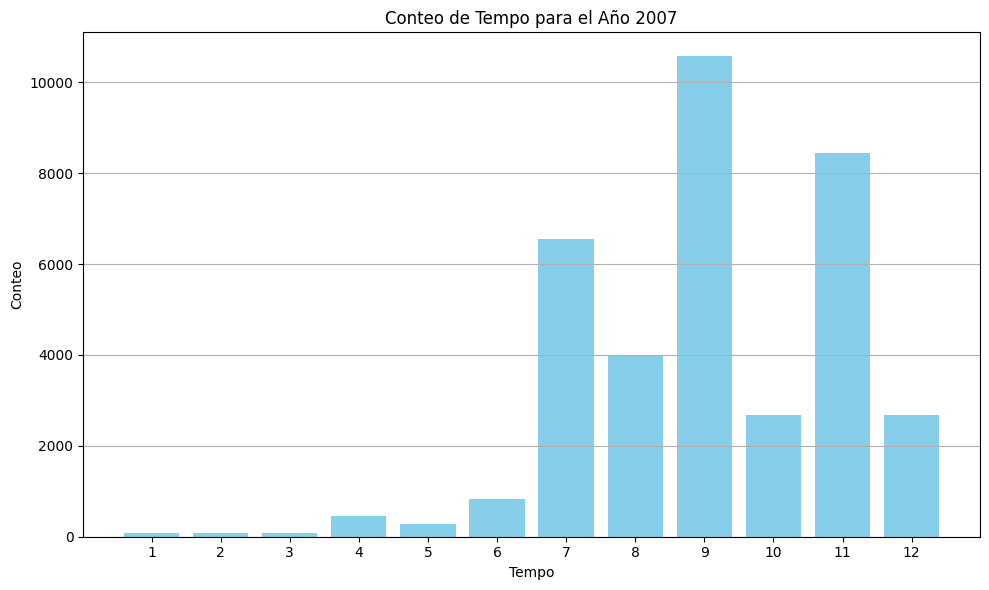

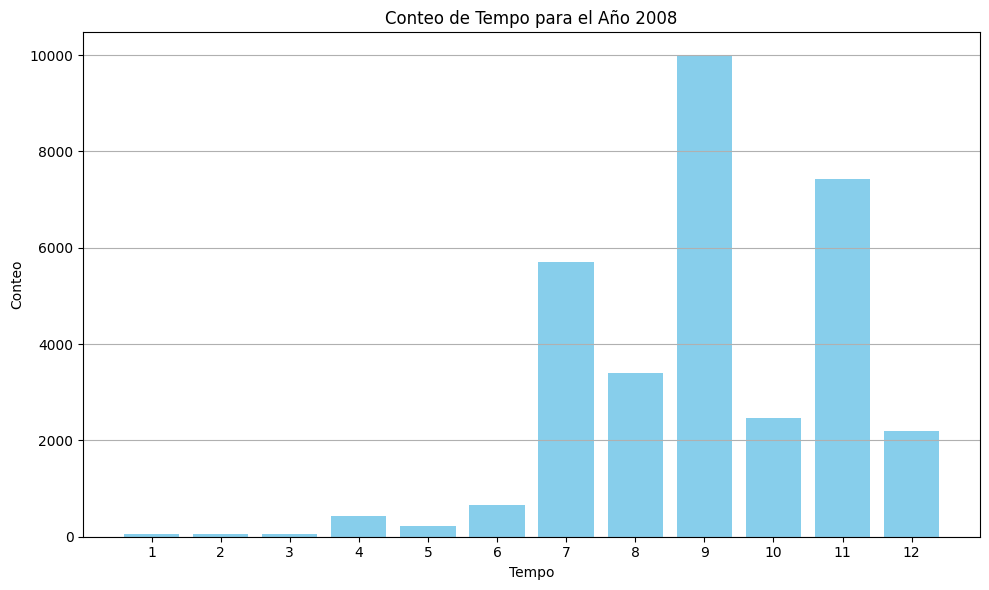

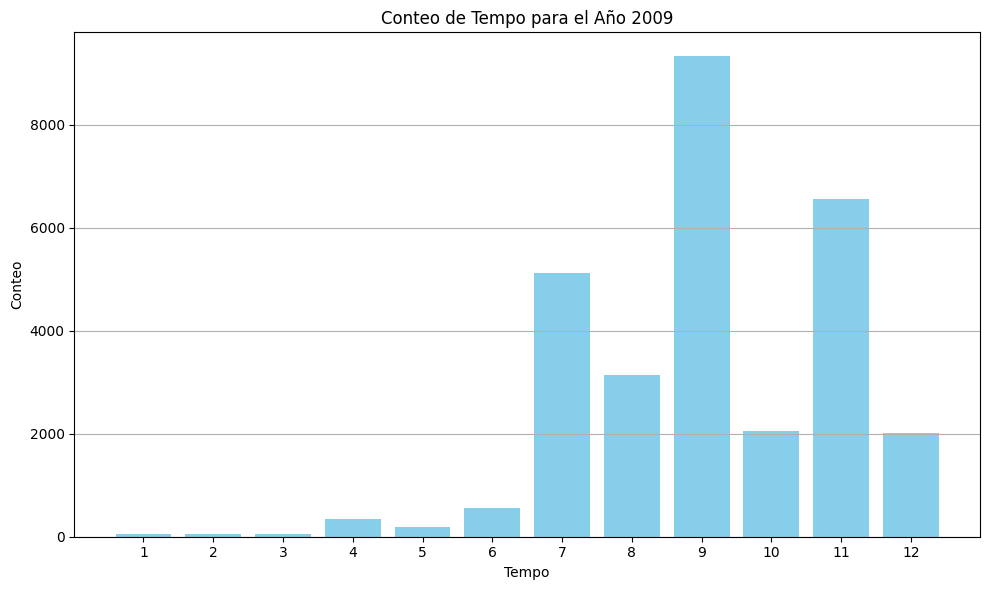

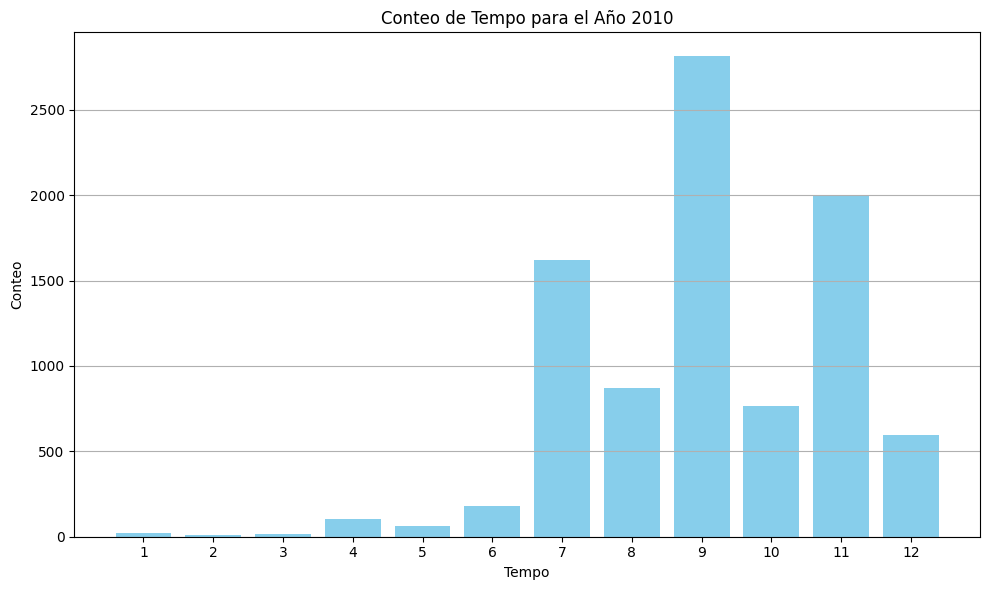

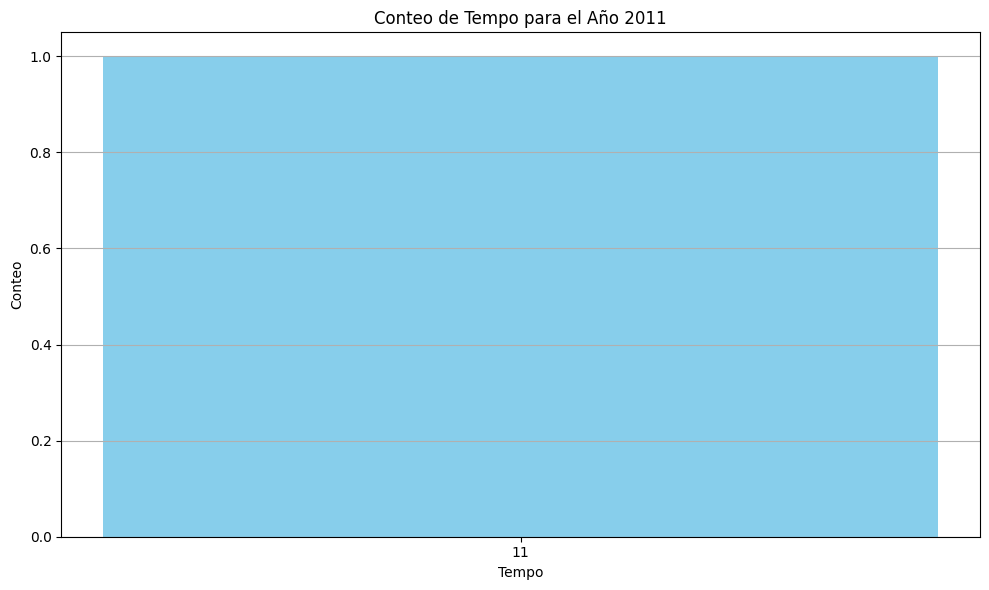

In [78]:
# year_to_plot = 2010

for year in unique_years:
    # Filtrar los datos para el año específico
    data_year = df[df['year'] == year]

    # Contar ocurrencias por tempo para el año específico
    tempo_counts = data_year['tempo'].value_counts().sort_index()

    # Crear el gráfico
    plt.figure(figsize=(10, 6))
    plt.bar(tempo_counts.index, tempo_counts.values, color='skyblue')
    plt.title(f'Conteo de Tempo para el Año {year}')
    plt.xlabel('Tempo')
    plt.ylabel('Conteo')
    plt.xticks(tempo_counts.index)  # Mostrar todas las categorías de tempo
    plt.grid(axis='y')

    # Mostrar el gráfico
    plt.tight_layout()
plt.show()